In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import norm, linregress

import os
import time
import itertools

from nsm.mse_model import *

from sklearn.model_selection import KFold

np.random.seed(12345)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# import file names
files = os.listdir("data/")
files = [f for f in files if "processed" in f]
files

['EXP0019_MS001_processed.csv',
 'EXP0019_MS014_processed.csv',
 'EXP0019_MS008_processed.csv',
 'EXP0019_DSM27147_processed.csv']

# Function to make predictions on test data

In [3]:
def predict_df(model, df, species, inputs):
    
    # save measured and predicted values
    pred_species = []
    pred = []
    stdv = []
    true = []

    # pull just the community data
    test_data = process_df(df, species, inputs) 

    # plot the results
    for exp, t_span, Y_m, inputs in test_data:

        # predict 
        Y_p, Y_std, _ = model.predict(Y_m, t_span, inputs)
        
        # set NaN to zero
        Y_p = np.nan_to_num(Y_p)
        Y_std = np.nan_to_num(Y_std)

        ### append only end-point prediction results for non-zero outcomes ###
        inds_pos = Y_m[-1,:] > 0 
        pred_species.append(np.array(species)[inds_pos])
        true.append(Y_m[-1,:][inds_pos])
        pred.append(Y_p[-1,:][inds_pos])
        stdv.append(Y_std[-1,:][inds_pos])
        
        # plot 
        t_eval = np.linspace(t_span[0], t_span[-1])
        # predict 
        Y_p, Y_std, R = model.predict(Y_m, t_eval, inputs)
        
        for i, s in enumerate(species):
            if Y_m[0,i] > 0:
                plt.scatter(t_span, Y_m[:, i], color=f'C{i}')
                plt.plot(t_eval, Y_p[:, i], c=f'C{i}')
                plt.fill_between(t_eval, Y_p[:, i]-Y_std[:,i], Y_p[:, i]+Y_std[:,i], 
                                 color=f'C{i}', alpha=.3)
        plt.ylim([0, 2])
        plt.show()
        for r_i in R.T:
            plt.plot(t_eval, r_i)
        plt.show()
        
        
    # concatenate list
    pred_species = np.concatenate(pred_species)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    stdv = np.concatenate(stdv)
        
    return pred_species, true, pred, stdv

Total samples: 38, Updated regularization: 1.00e-03
Loss: 22.817, Residuals: -1.405
Loss: 12.665, Residuals: -1.120
Loss: 9.584, Residuals: -0.503
Loss: 8.288, Residuals: -0.404
Loss: 6.809, Residuals: -0.461
Loss: 6.454, Residuals: -0.299
Loss: 5.741, Residuals: -0.280
Loss: 5.325, Residuals: -0.281
Loss: 5.115, Residuals: -0.208
Loss: 4.140, Residuals: -0.222
Loss: 3.982, Residuals: -0.179
Loss: 3.688, Residuals: -0.171
Loss: 3.293, Residuals: -0.207
Loss: 3.204, Residuals: -0.109
Loss: 3.035, Residuals: -0.119
Loss: 2.966, Residuals: -0.071
Loss: 2.753, Residuals: -0.062
Loss: 2.733, Residuals: -0.064
Loss: 2.543, Residuals: -0.064
Loss: 2.537, Residuals: -0.080
Optimization terminated successfully.
Evidence -237.032
Updating precision...
Total samples: 38, Updated regularization: 1.61e-03
Loss: 7.257, Residuals: -0.067
Loss: 7.200, Residuals: -0.055
Optimization terminated successfully.
Evidence -92.059
Updating precision...
Total samples: 38, Updated regularization: 2.35e-03
Loss:

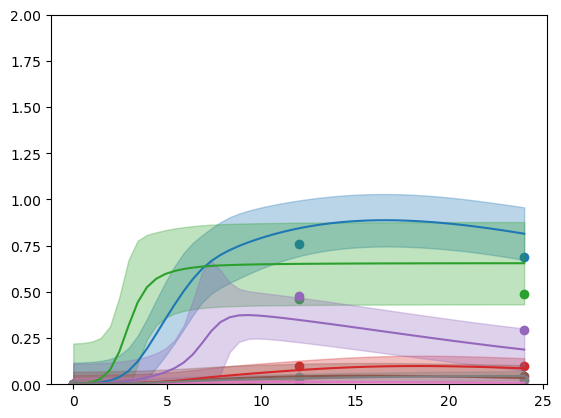

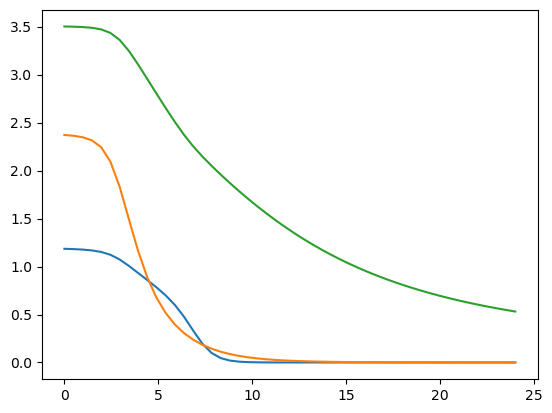

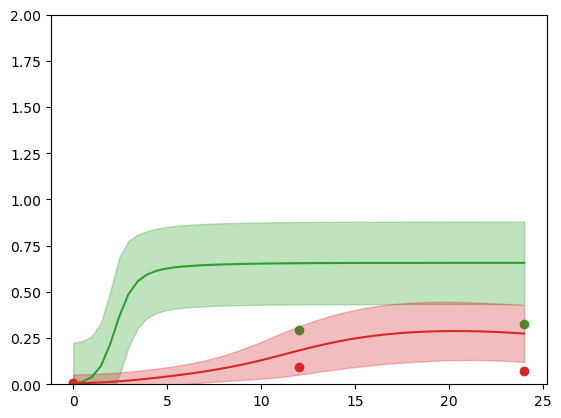

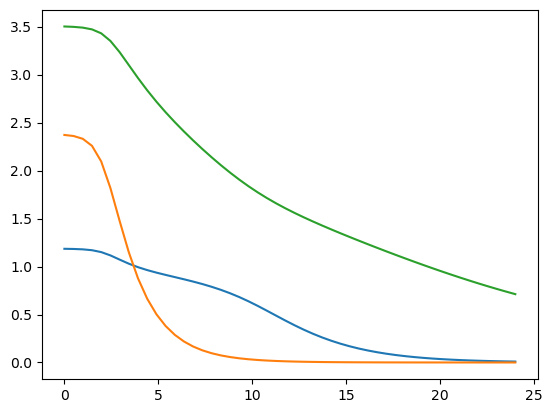

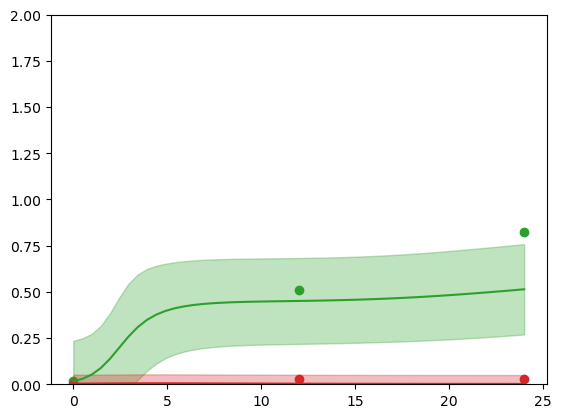

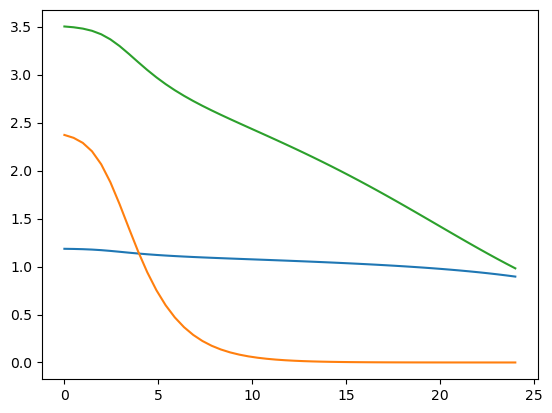

Total samples: 38, Updated regularization: 1.00e-03
Loss: 15.604, Residuals: -0.276
Loss: 11.446, Residuals: -0.764
Loss: 8.513, Residuals: -0.510
Loss: 7.061, Residuals: -0.397
Loss: 6.331, Residuals: -0.327
Loss: 5.216, Residuals: -0.294
Loss: 4.668, Residuals: -0.248
Loss: 4.325, Residuals: -0.245
Loss: 4.115, Residuals: -0.069
Loss: 3.688, Residuals: -0.075
Loss: 3.653, Residuals: -0.047
Loss: 2.993, Residuals: -0.122
Loss: 2.927, Residuals: -0.065
Loss: 2.804, Residuals: -0.066
Loss: 2.614, Residuals: -0.083
Loss: 2.506, Residuals: -0.102
Loss: 2.492, Residuals: -0.080
Optimization terminated successfully.
Evidence -219.735
Updating precision...
Total samples: 38, Updated regularization: 1.54e-03
Loss: 7.613, Residuals: -0.090
Loss: 7.547, Residuals: -0.056
Loss: 7.173, Residuals: -0.069
Loss: 7.002, Residuals: -0.054
Optimization terminated successfully.
Evidence -65.002
Updating precision...
Total samples: 38, Updated regularization: 2.18e-03
Loss: 15.488, Residuals: -0.056
Loss

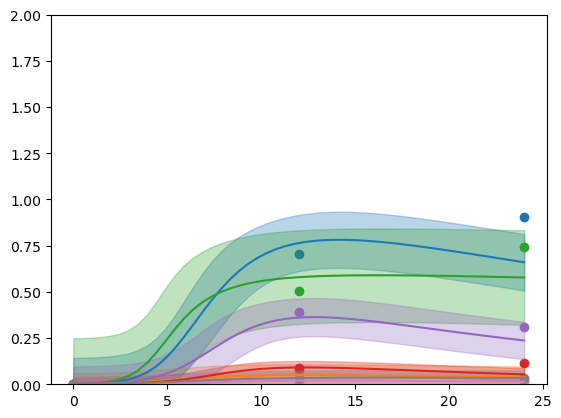

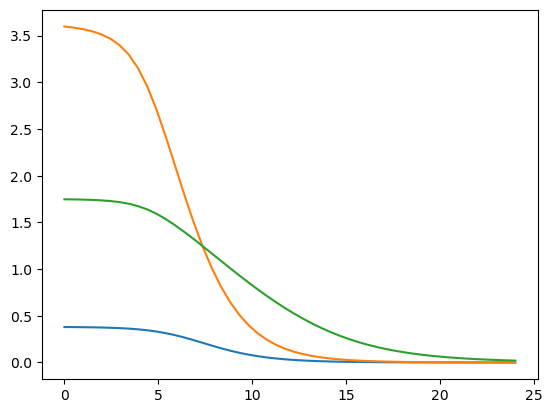

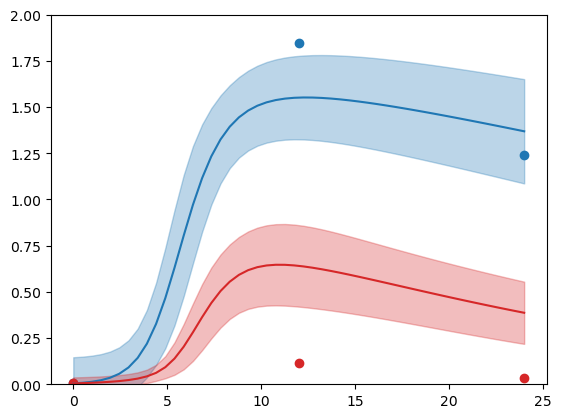

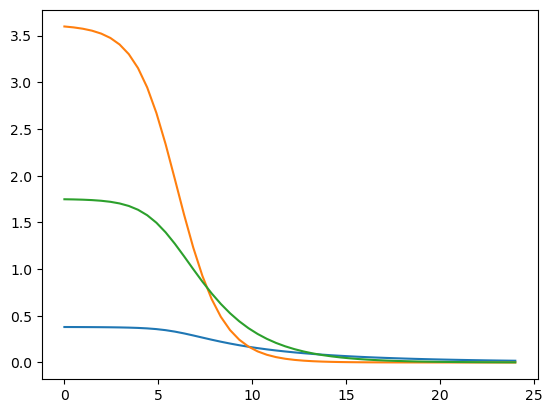

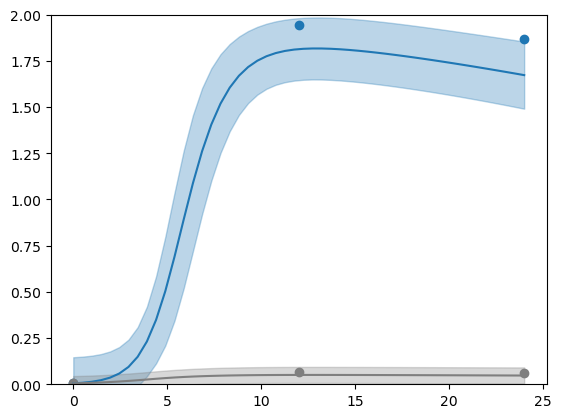

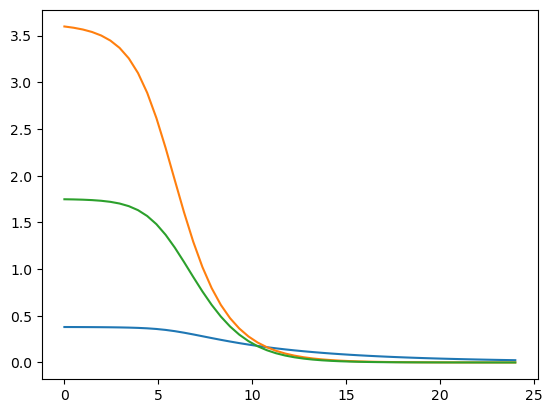

Total samples: 40, Updated regularization: 1.00e-03
Loss: 15.513, Residuals: -0.392
Loss: 9.110, Residuals: -0.818
Loss: 7.134, Residuals: -0.643
Loss: 6.407, Residuals: -0.382
Loss: 6.072, Residuals: -0.405
Loss: 5.495, Residuals: -0.395
Loss: 5.456, Residuals: -0.401
Optimization terminated successfully.
Evidence -129.777
Updating precision...
Total samples: 40, Updated regularization: 1.25e-03
Loss: 26.740, Residuals: -0.293
Loss: 23.473, Residuals: -0.218
Loss: 21.833, Residuals: -0.087
Loss: 19.528, Residuals: -0.069
Loss: 16.671, Residuals: -0.096
Loss: 15.661, Residuals: -0.046
Loss: 13.887, Residuals: -0.053
Loss: 13.647, Residuals: -0.064
Loss: 11.904, Residuals: -0.070
Loss: 11.476, Residuals: -0.076
Loss: 11.299, Residuals: -0.015
Loss: 10.360, Residuals: -0.042
Loss: 9.947, Residuals: -0.047
Loss: 9.354, Residuals: -0.061
Loss: 9.274, Residuals: -0.042
Loss: 8.687, Residuals: -0.065
Loss: 8.519, Residuals: -0.036
Loss: 8.199, Residuals: -0.041
Loss: 7.809, Residuals: -0.040

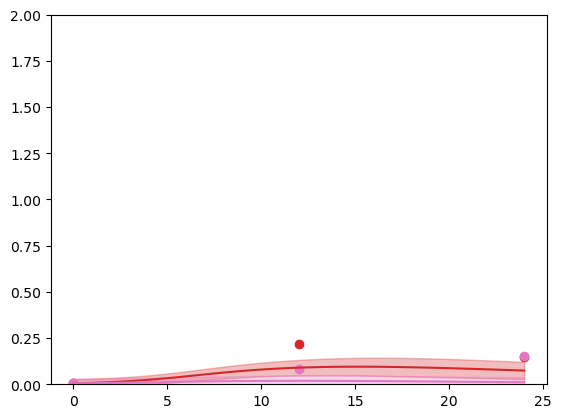

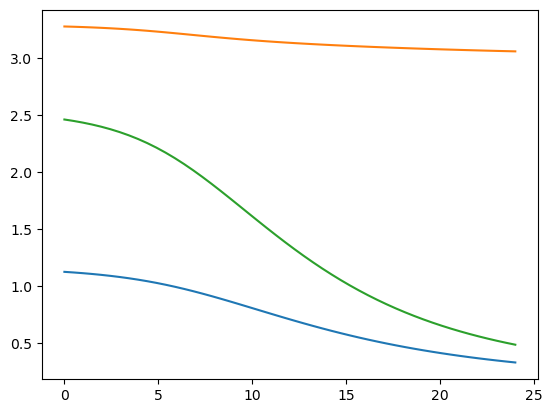

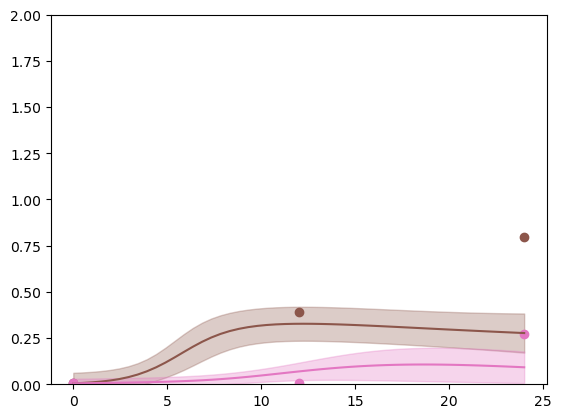

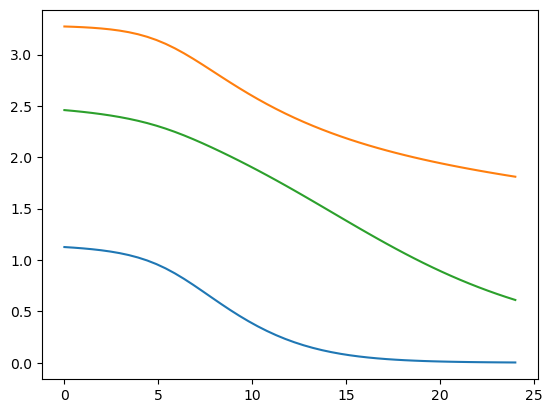

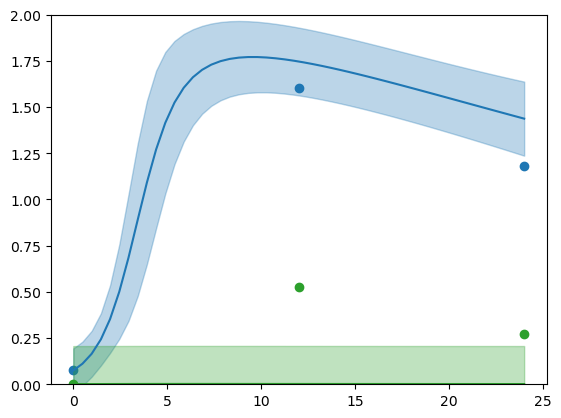

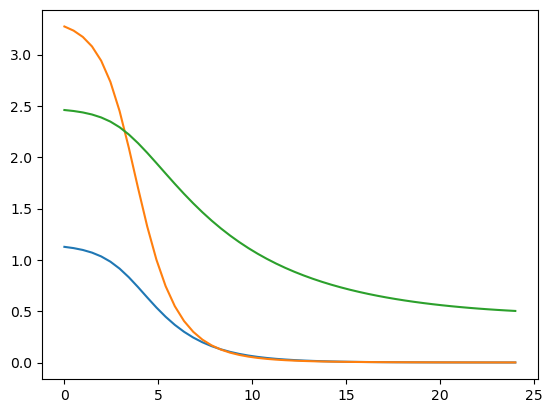

Total samples: 40, Updated regularization: 1.00e-03
Loss: 14.667, Residuals: -0.949
Loss: 7.618, Residuals: -0.677
Loss: 6.011, Residuals: -0.385
Loss: 5.631, Residuals: -0.344
Loss: 4.960, Residuals: -0.305
Loss: 4.189, Residuals: -0.227
Loss: 3.882, Residuals: -0.222
Loss: 3.623, Residuals: -0.083
Loss: 3.328, Residuals: -0.051
Loss: 3.246, Residuals: -0.041
Optimization terminated successfully.
Evidence -233.554
Updating precision...
Total samples: 40, Updated regularization: 1.63e-03
Loss: 7.886, Residuals: -0.051
Loss: 7.829, Residuals: -0.033
Optimization terminated successfully.
Evidence -69.756
Updating precision...
Total samples: 40, Updated regularization: 2.32e-03
Loss: 17.495, Residuals: -0.109
Loss: 16.904, Residuals: -0.099
Loss: 16.085, Residuals: -0.088
Loss: 14.955, Residuals: -0.067
Loss: 13.181, Residuals: -0.099
Loss: 12.799, Residuals: -0.059
Loss: 12.700, Residuals: -0.030
Loss: 11.791, Residuals: -0.033
Loss: 11.746, Residuals: -0.031
Optimization terminated succ

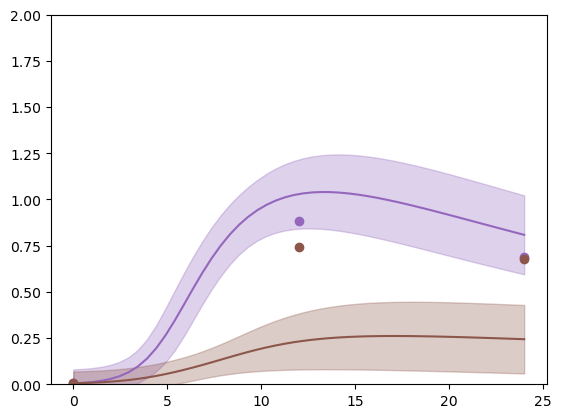

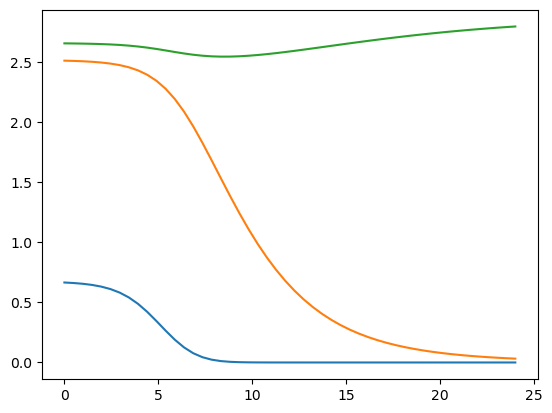

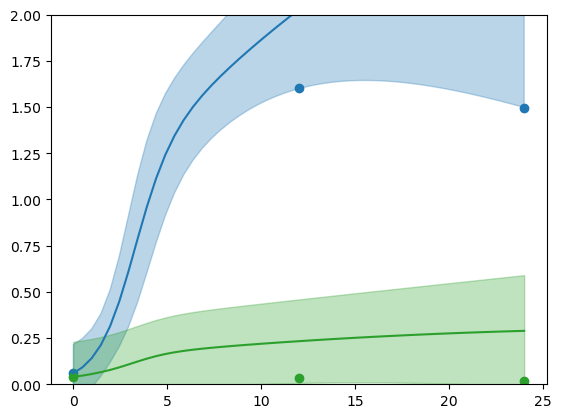

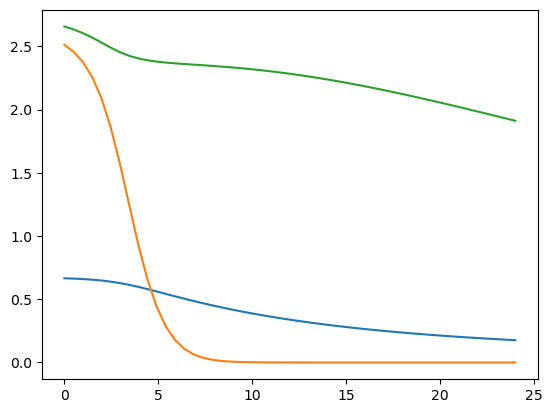

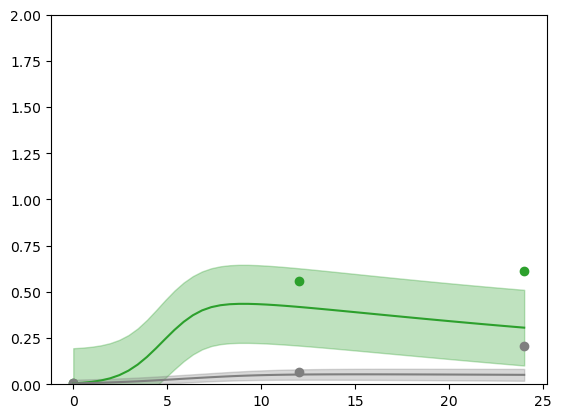

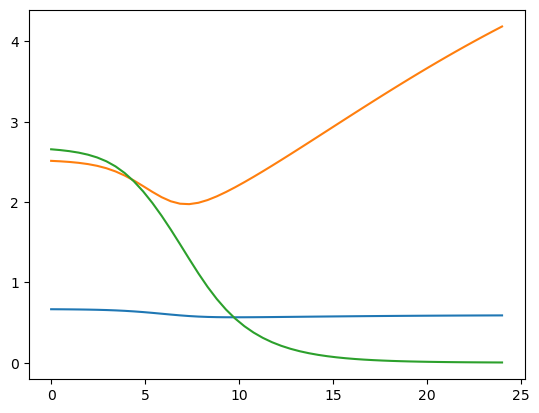

Total samples: 40, Updated regularization: 1.00e-03
Loss: 15.532, Residuals: -0.507
Loss: 12.612, Residuals: -0.776
Loss: 11.786, Residuals: -0.769
Loss: 11.077, Residuals: -0.716
Loss: 10.655, Residuals: -0.652
Loss: 7.914, Residuals: -0.414
Loss: 6.101, Residuals: -0.145
Loss: 5.395, Residuals: -0.255
Loss: 4.610, Residuals: -0.193
Loss: 4.376, Residuals: -0.210
Loss: 3.994, Residuals: -0.150
Loss: 3.361, Residuals: -0.125
Loss: 3.284, Residuals: -0.063
Loss: 3.140, Residuals: -0.068
Loss: 2.907, Residuals: -0.081
Loss: 2.758, Residuals: -0.101
Loss: 2.729, Residuals: -0.070
Optimization terminated successfully.
Evidence -195.431
Updating precision...
Total samples: 40, Updated regularization: 1.46e-03
Loss: 9.971, Residuals: -0.064
Loss: 9.774, Residuals: -0.066
Loss: 9.590, Residuals: -0.079
Loss: 9.250, Residuals: -0.073
Loss: 8.849, Residuals: -0.079
Loss: 8.759, Residuals: -0.040
Loss: 8.582, Residuals: -0.041
Loss: 8.344, Residuals: -0.044
Loss: 8.224, Residuals: -0.019
Loss: 8

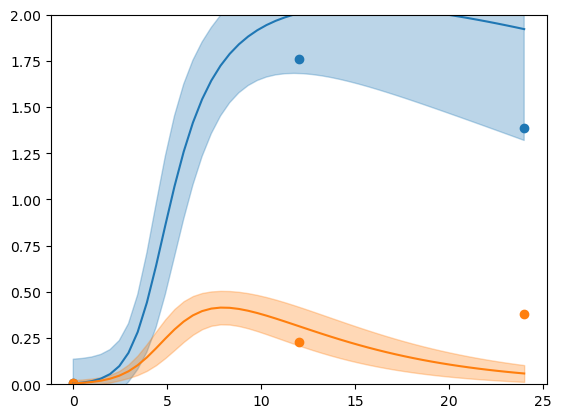

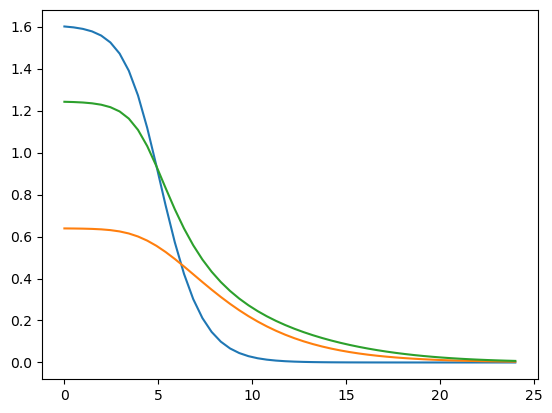

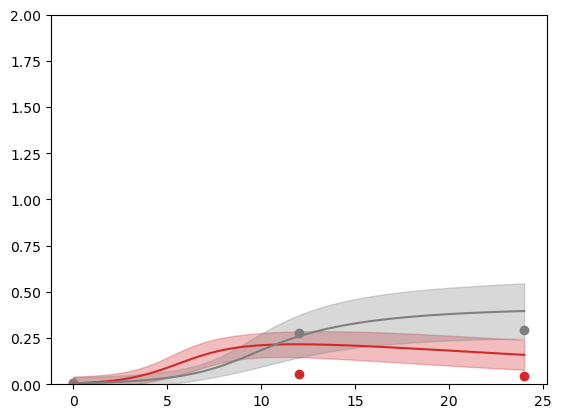

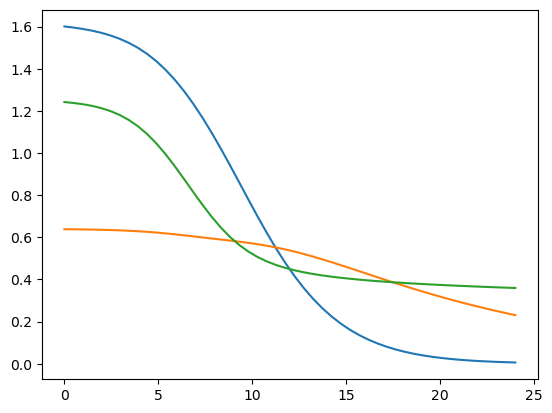

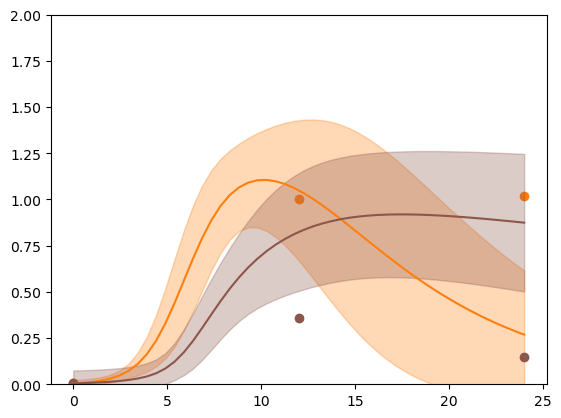

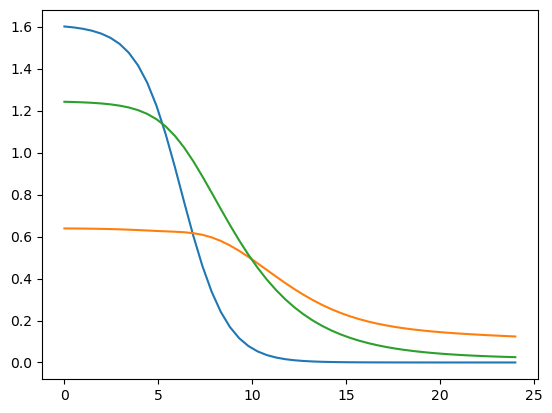

Total samples: 37, Updated regularization: 1.00e-03
Loss: 22.506, Residuals: -1.319
Loss: 17.246, Residuals: -1.115
Loss: 11.303, Residuals: -0.605
Loss: 7.535, Residuals: -0.532
Loss: 5.866, Residuals: -0.439
Loss: 5.465, Residuals: -0.183
Loss: 4.741, Residuals: -0.172
Loss: 3.949, Residuals: -0.199
Loss: 3.423, Residuals: -0.106
Loss: 3.046, Residuals: -0.120
Loss: 2.790, Residuals: -0.206
Loss: 2.681, Residuals: -0.104
Loss: 2.491, Residuals: -0.098
Loss: 2.449, Residuals: -0.034
Loss: 2.255, Residuals: -0.058
Loss: 2.239, Residuals: -0.053
Optimization terminated successfully.
Evidence -243.124
Updating precision...
Total samples: 37, Updated regularization: 1.64e-03
Loss: 6.833, Residuals: -0.051
Loss: 6.480, Residuals: -0.056
Loss: 6.433, Residuals: -0.023
Loss: 6.010, Residuals: -0.034
Loss: 5.971, Residuals: -0.021
Loss: 5.625, Residuals: -0.027
Loss: 5.530, Residuals: 0.004
Loss: 5.356, Residuals: 0.002
Loss: 5.106, Residuals: 0.006
Loss: 5.052, Residuals: -0.001
Optimization

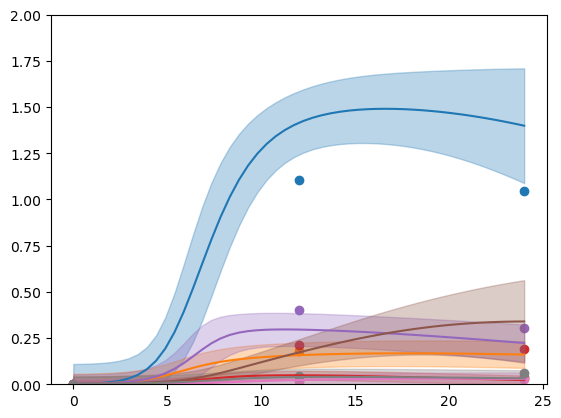

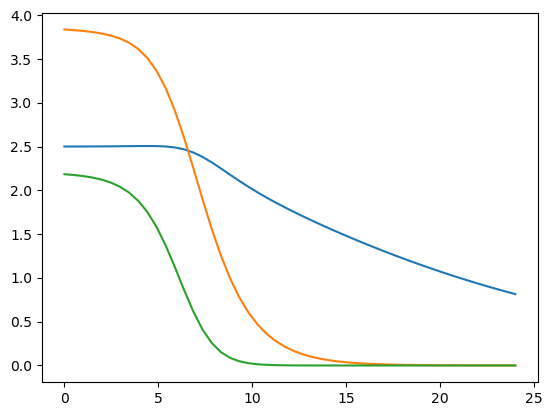

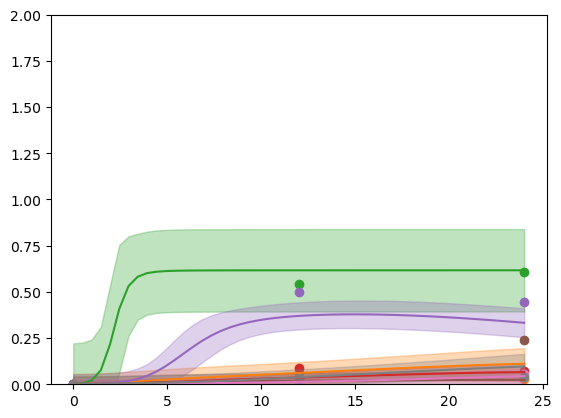

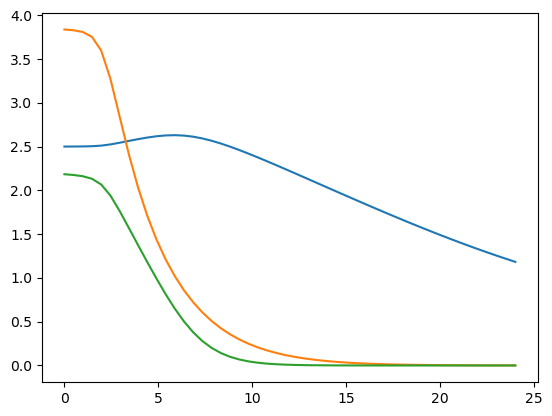

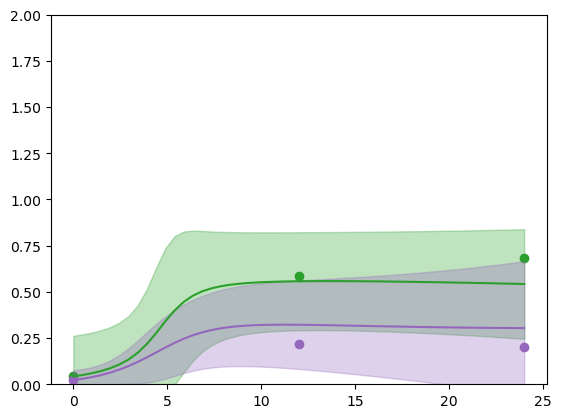

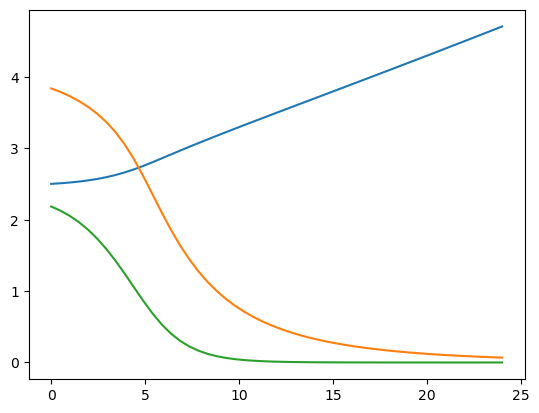

Total samples: 40, Updated regularization: 1.00e-03
Loss: 13.458, Residuals: -1.002
Loss: 10.368, Residuals: -0.660
Loss: 7.417, Residuals: -0.552
Loss: 6.984, Residuals: -0.435
Loss: 6.212, Residuals: -0.421
Loss: 5.075, Residuals: -0.349
Loss: 5.004, Residuals: -0.306
Optimization terminated successfully.
Evidence -182.061
Updating precision...
Total samples: 40, Updated regularization: 1.42e-03
Loss: 14.603, Residuals: -0.131
Loss: 14.407, Residuals: -0.102
Optimization terminated successfully.
Evidence -15.548
Updating precision...
Total samples: 40, Updated regularization: 1.92e-03
Loss: 30.708, Residuals: -0.118
Loss: 24.640, Residuals: -0.129
Loss: 23.501, Residuals: -0.111
Loss: 23.199, Residuals: -0.070
Loss: 20.499, Residuals: -0.103
Loss: 20.296, Residuals: -0.056
Loss: 18.427, Residuals: -0.082
Loss: 18.372, Residuals: -0.074
Optimization terminated successfully.
Evidence 88.759
Updating precision...
Total samples: 40, Updated regularization: 2.66e-03
Loss: 34.755, Residual

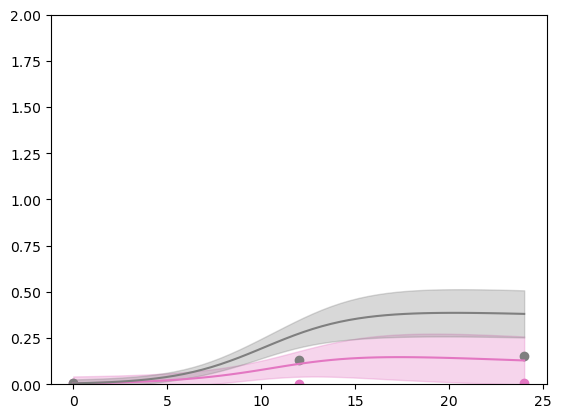

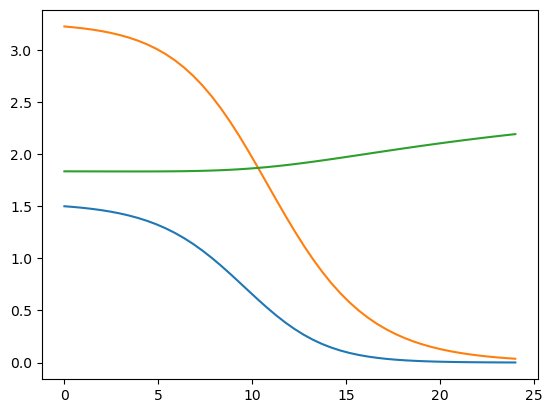

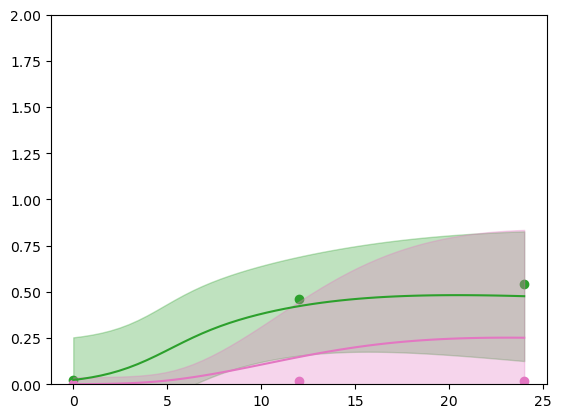

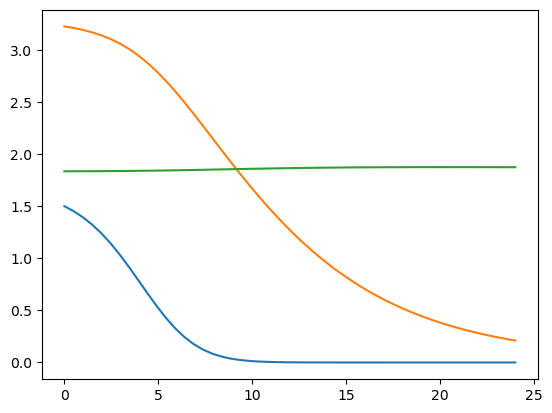

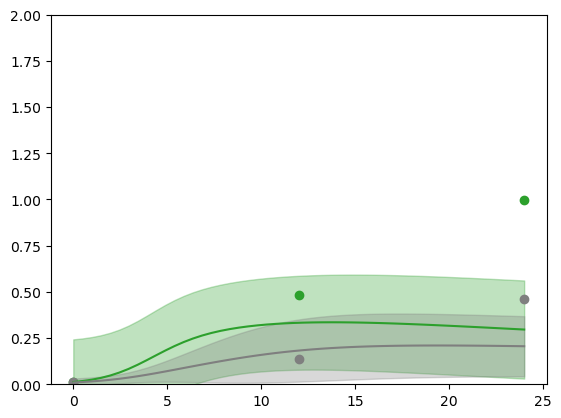

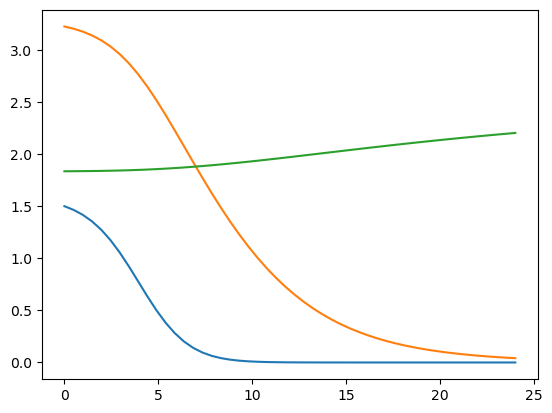

Total samples: 38, Updated regularization: 1.00e-03
Loss: 38.133, Residuals: -1.545
Loss: 23.678, Residuals: -0.429
Loss: 17.576, Residuals: -1.113
Loss: 14.201, Residuals: -0.895
Loss: 12.035, Residuals: -0.765
Loss: 11.317, Residuals: -0.764
Loss: 10.606, Residuals: -0.766
Loss: 10.275, Residuals: -0.604
Loss: 9.730, Residuals: -0.636
Loss: 9.495, Residuals: -0.576
Loss: 5.853, Residuals: -0.525
Loss: 4.458, Residuals: -0.130
Loss: 4.264, Residuals: -0.091
Loss: 3.905, Residuals: -0.109
Loss: 3.469, Residuals: -0.162
Loss: 3.174, Residuals: -0.071
Loss: 3.028, Residuals: -0.033
Loss: 2.931, Residuals: -0.077
Loss: 2.762, Residuals: -0.093
Loss: 2.611, Residuals: -0.078
Loss: 2.587, Residuals: -0.054
Optimization terminated successfully.
Evidence -213.716
Updating precision...
Total samples: 38, Updated regularization: 1.52e-03
Loss: 8.198, Residuals: -0.081
Loss: 8.149, Residuals: -0.062
Optimization terminated successfully.
Evidence -46.003
Updating precision...
Total samples: 38, U

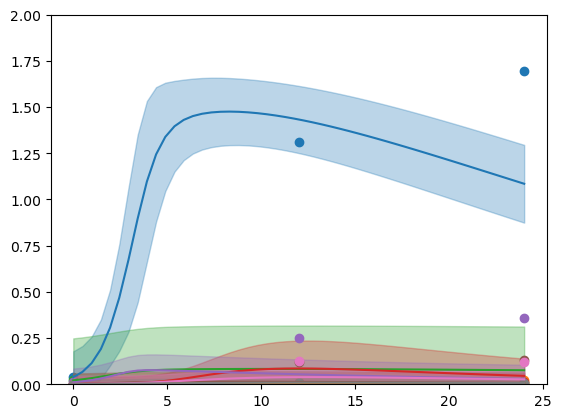

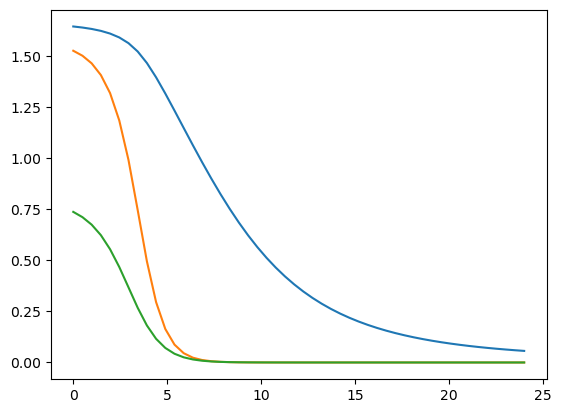

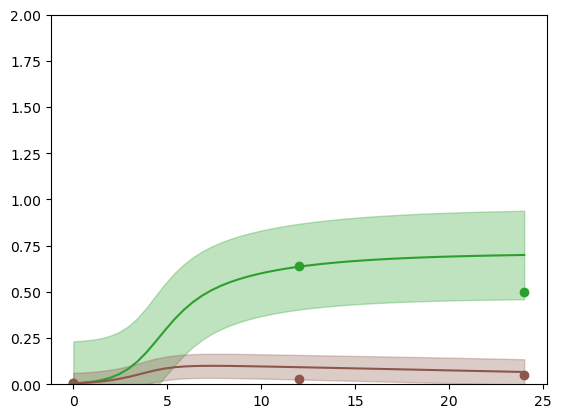

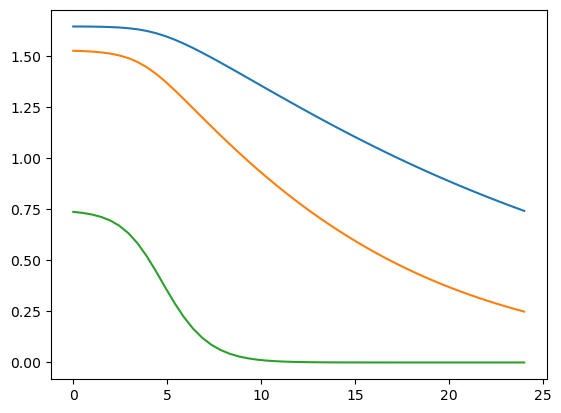

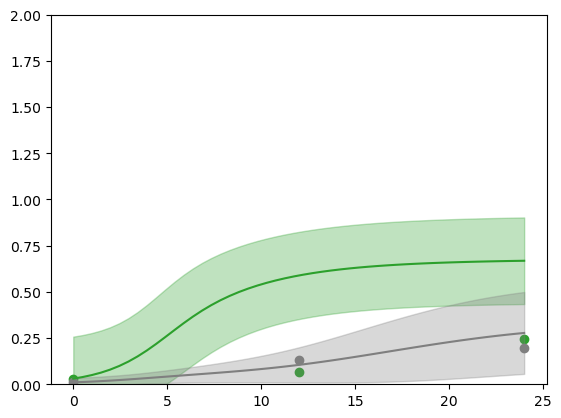

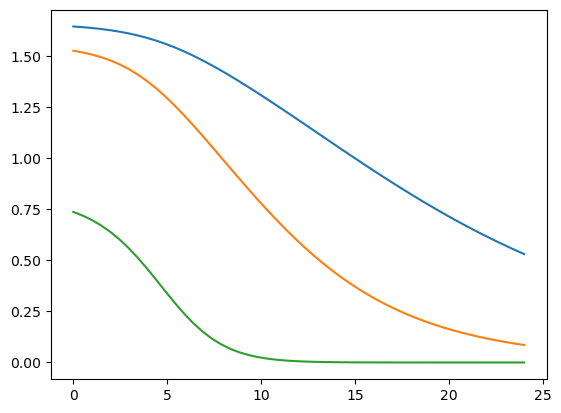

Total samples: 37, Updated regularization: 1.00e-03
Loss: 42.936, Residuals: -1.901
Loss: 39.187, Residuals: -1.795
Loss: 14.343, Residuals: -1.073
Loss: 10.953, Residuals: -0.543
Loss: 7.958, Residuals: -0.563
Loss: 6.660, Residuals: -0.454
Loss: 6.395, Residuals: -0.264
Loss: 5.507, Residuals: -0.273
Loss: 5.020, Residuals: -0.243
Loss: 4.679, Residuals: -0.212
Loss: 4.569, Residuals: -0.161
Loss: 4.177, Residuals: -0.136
Loss: 3.877, Residuals: -0.120
Loss: 3.651, Residuals: -0.118
Loss: 3.463, Residuals: -0.071
Loss: 3.173, Residuals: -0.126
Loss: 3.117, Residuals: -0.085
Optimization terminated successfully.
Evidence -213.872
Updating precision...
Total samples: 37, Updated regularization: 1.51e-03
Loss: 9.136, Residuals: -0.097
Loss: 8.824, Residuals: -0.110
Loss: 8.791, Residuals: -0.086
Optimization terminated successfully.
Evidence -53.270
Updating precision...
Total samples: 37, Updated regularization: 1.97e-03
Loss: 20.119, Residuals: -0.108
Loss: 20.058, Residuals: -0.089
O

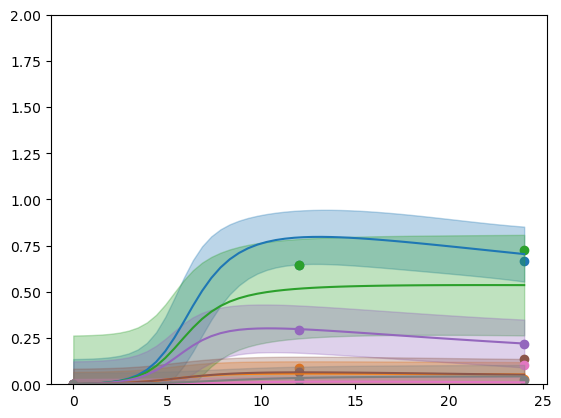

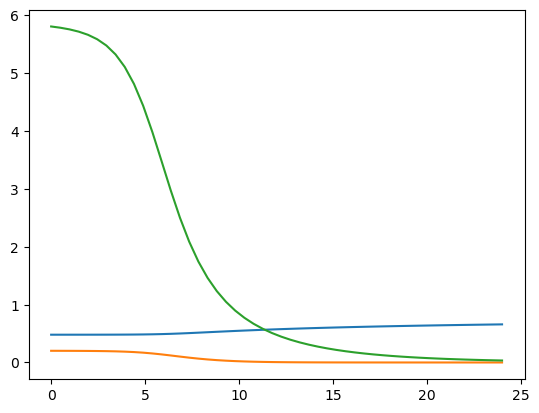

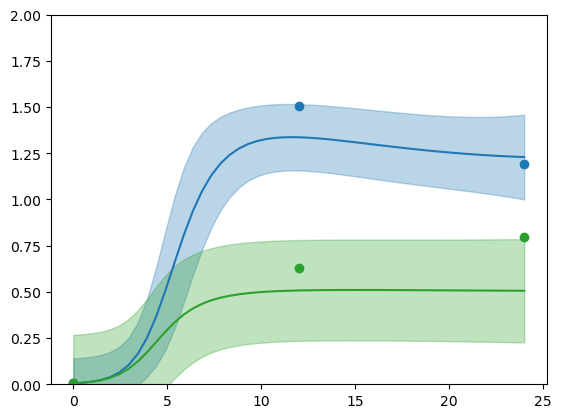

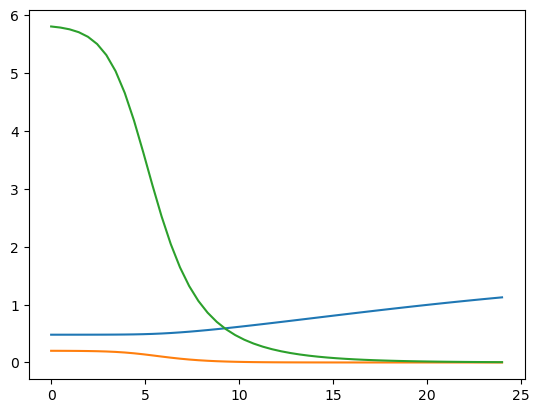

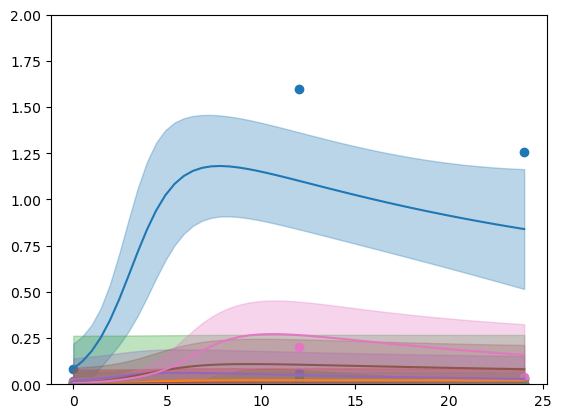

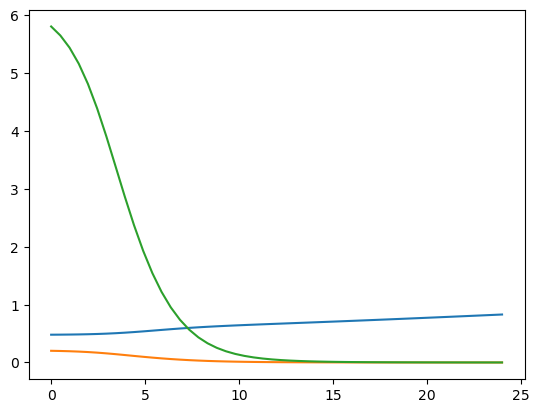

Total samples: 40, Updated regularization: 1.00e-03
Loss: 42.186, Residuals: -1.591
Loss: 36.913, Residuals: -1.345
Loss: 31.496, Residuals: 0.137
Loss: 22.892, Residuals: -0.220
Loss: 14.661, Residuals: -0.923
Loss: 12.147, Residuals: -0.748
Loss: 7.843, Residuals: -0.646
Loss: 6.862, Residuals: -0.327
Loss: 6.102, Residuals: -0.343
Loss: 5.955, Residuals: -0.272
Loss: 5.365, Residuals: -0.282
Loss: 5.097, Residuals: -0.260
Loss: 5.004, Residuals: -0.248
Loss: 4.822, Residuals: -0.244
Loss: 4.540, Residuals: -0.230
Loss: 4.459, Residuals: -0.239
Loss: 3.858, Residuals: -0.187
Loss: 3.732, Residuals: -0.182
Loss: 3.496, Residuals: -0.166
Loss: 3.337, Residuals: -0.137
Loss: 3.158, Residuals: -0.102
Loss: 3.115, Residuals: -0.093
Loss: 2.920, Residuals: -0.084
Loss: 2.819, Residuals: -0.078
Loss: 2.793, Residuals: -0.083
Loss: 2.606, Residuals: -0.087
Loss: 2.575, Residuals: -0.081
Optimization terminated successfully.
Evidence -211.271
Updating precision...
Total samples: 40, Updated r

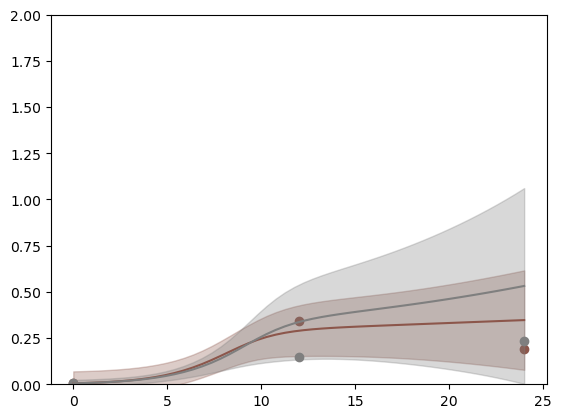

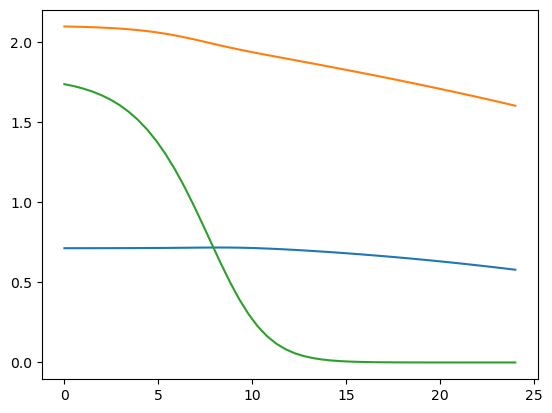

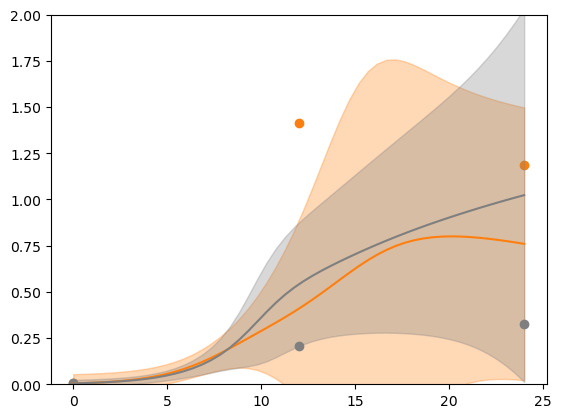

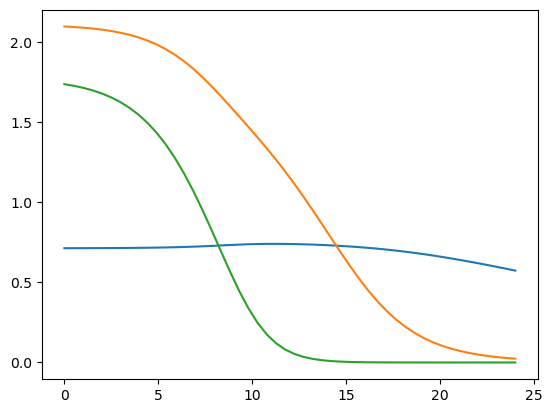

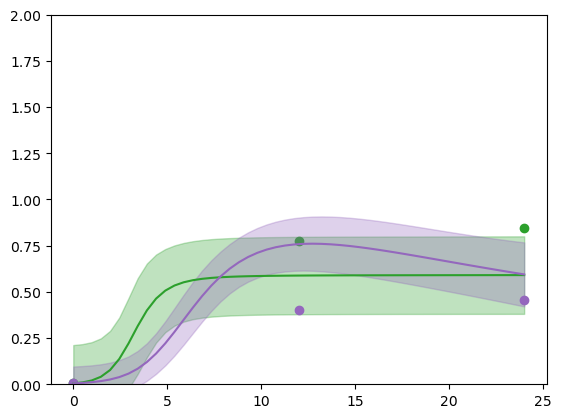

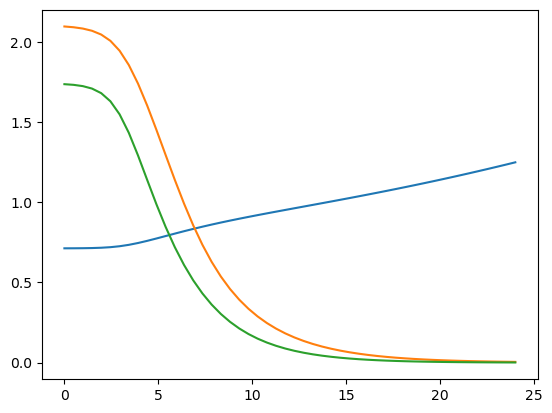

Total samples: 38, Updated regularization: 1.00e-03
Loss: 16.795, Residuals: -0.630
Loss: 11.408, Residuals: -0.704
Loss: 8.256, Residuals: -0.454
Loss: 6.333, Residuals: -0.308
Loss: 5.439, Residuals: -0.315
Loss: 4.727, Residuals: -0.115
Loss: 4.202, Residuals: -0.165
Loss: 3.781, Residuals: -0.108
Loss: 3.325, Residuals: -0.171
Loss: 3.262, Residuals: -0.115
Loss: 3.216, Residuals: -0.098
Loss: 3.006, Residuals: -0.093
Loss: 2.964, Residuals: -0.104
Optimization terminated successfully.
Evidence -181.837
Updating precision...
Total samples: 38, Updated regularization: 1.43e-03
Loss: 10.206, Residuals: -0.091
Loss: 10.144, Residuals: -0.083
Optimization terminated successfully.
Evidence -4.516
Updating precision...
Total samples: 38, Updated regularization: 1.93e-03
Loss: 24.170, Residuals: -0.065
Loss: 24.080, Residuals: -0.065
Optimization terminated successfully.
Evidence 116.649
Updating precision...
Total samples: 38, Updated regularization: 2.56e-03
Loss: 43.944, Residuals: -0.

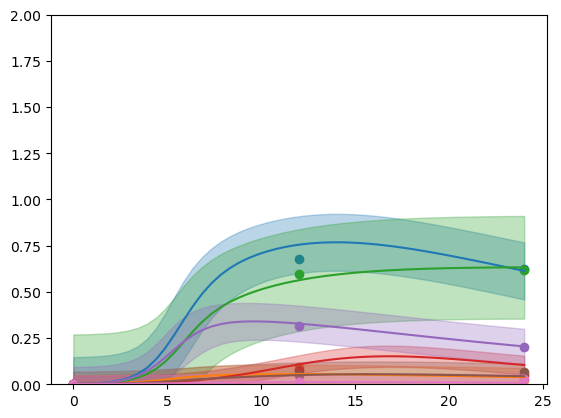

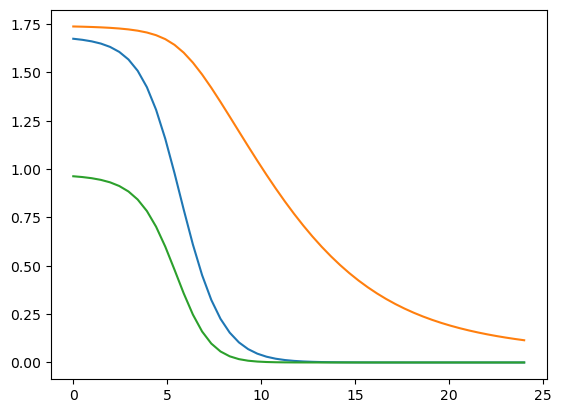

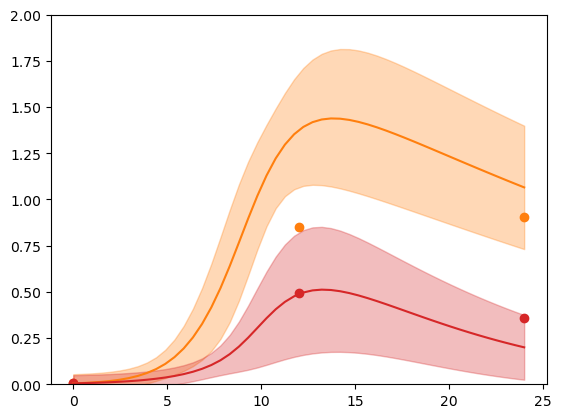

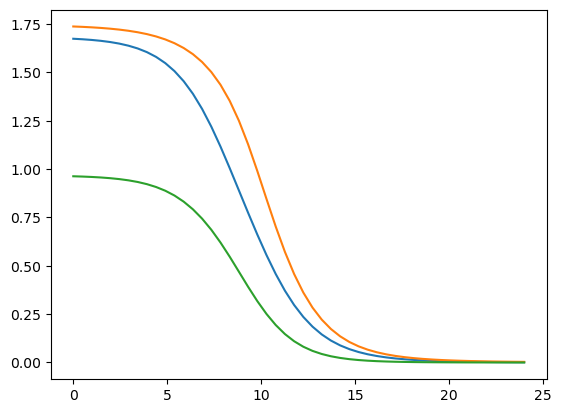

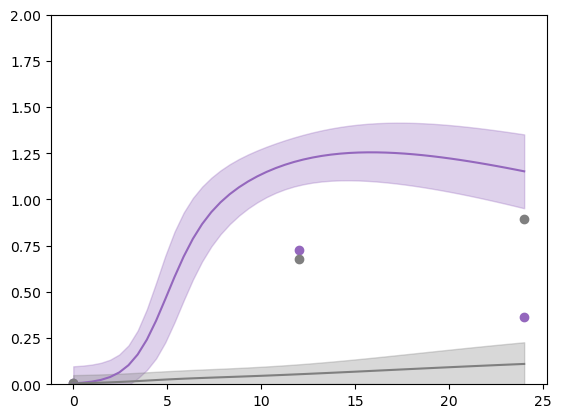

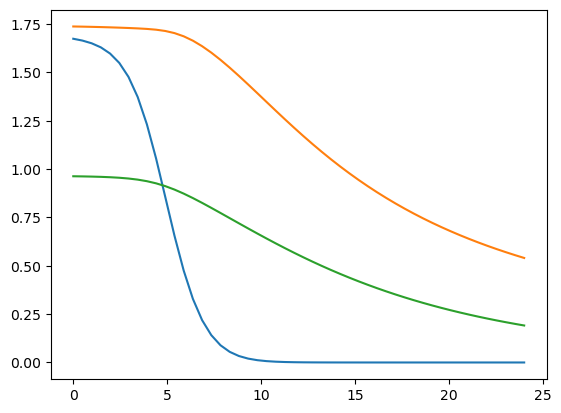

Total samples: 40, Updated regularization: 1.00e-03
Loss: 18.710, Residuals: -1.183
Loss: 15.299, Residuals: -0.991
Loss: 9.979, Residuals: -0.725
Loss: 8.110, Residuals: -0.352
Loss: 6.733, Residuals: -0.428
Loss: 6.162, Residuals: -0.360
Loss: 5.358, Residuals: -0.351
Loss: 5.181, Residuals: -0.267
Loss: 4.526, Residuals: -0.275
Loss: 4.179, Residuals: -0.175
Loss: 4.097, Residuals: -0.118
Loss: 3.716, Residuals: -0.124
Loss: 3.689, Residuals: -0.135
Optimization terminated successfully.
Evidence -191.255
Updating precision...
Total samples: 40, Updated regularization: 1.46e-03
Loss: 11.253, Residuals: -0.129
Loss: 10.115, Residuals: -0.151
Loss: 9.853, Residuals: -0.113
Loss: 9.482, Residuals: -0.095
Loss: 8.808, Residuals: -0.085
Loss: 8.560, Residuals: -0.070
Loss: 8.540, Residuals: -0.071
Optimization terminated successfully.
Evidence -29.440
Updating precision...
Total samples: 40, Updated regularization: 2.03e-03
Loss: 20.853, Residuals: -0.082
Loss: 20.567, Residuals: -0.031
L

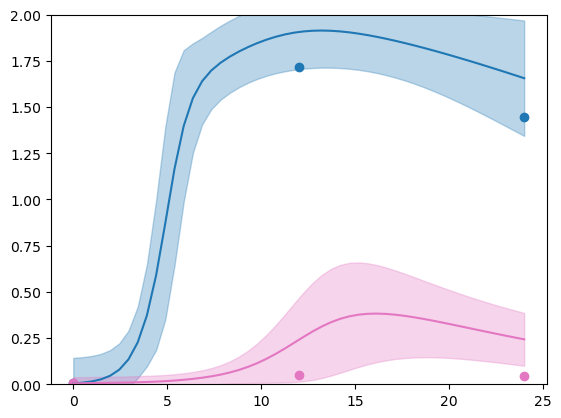

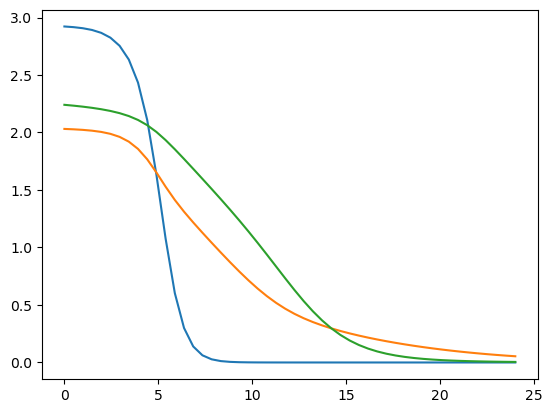

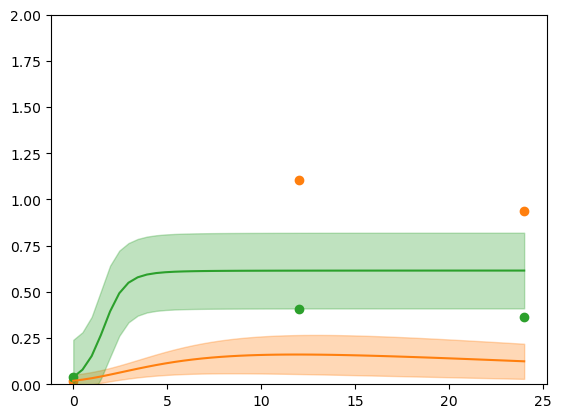

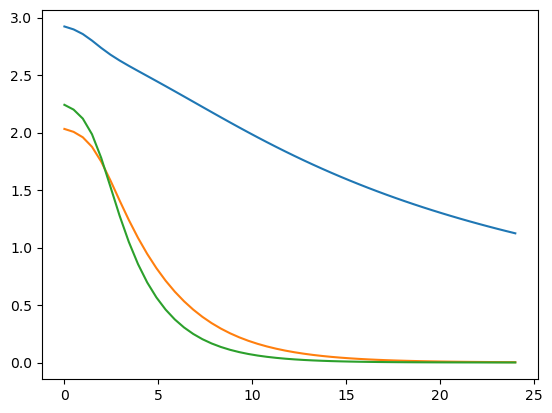

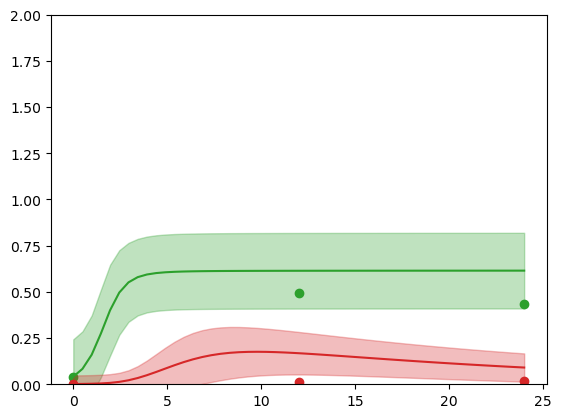

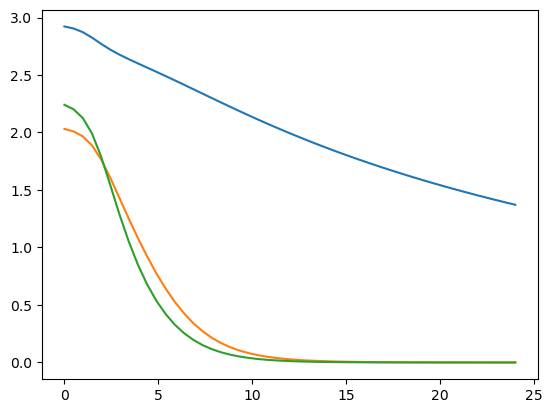

Total samples: 38, Updated regularization: 1.00e-03
Loss: 21.160, Residuals: -1.211
Loss: 13.700, Residuals: -0.825
Loss: 10.690, Residuals: -0.776
Loss: 6.885, Residuals: -0.510
Loss: 5.728, Residuals: -0.379
Loss: 5.567, Residuals: -0.238
Loss: 4.972, Residuals: -0.264
Loss: 4.562, Residuals: -0.207
Loss: 4.062, Residuals: -0.207
Loss: 3.923, Residuals: -0.065
Loss: 3.284, Residuals: -0.063
Loss: 3.253, Residuals: -0.077
Optimization terminated successfully.
Evidence -213.986
Updating precision...
Total samples: 38, Updated regularization: 1.54e-03
Loss: 9.156, Residuals: -0.116
Loss: 9.025, Residuals: -0.060
Loss: 8.774, Residuals: -0.065
Loss: 8.390, Residuals: -0.085
Loss: 8.318, Residuals: -0.056
Optimization terminated successfully.
Evidence -57.422
Updating precision...
Total samples: 38, Updated regularization: 2.12e-03
Loss: 19.345, Residuals: -0.068
Loss: 19.219, Residuals: -0.058
Loss: 18.050, Residuals: -0.070
Loss: 17.908, Residuals: -0.054
Loss: 16.842, Residuals: -0.060

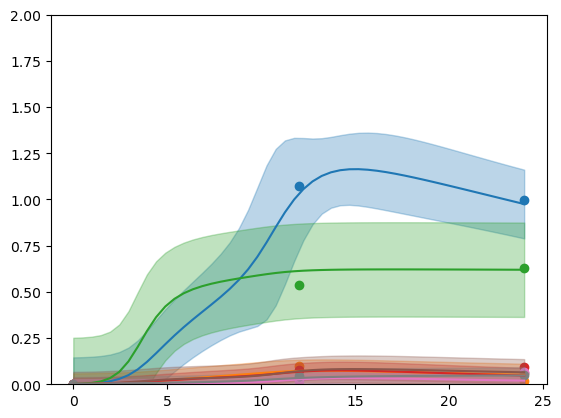

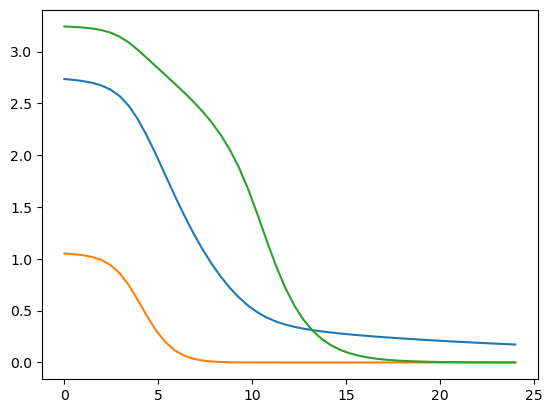

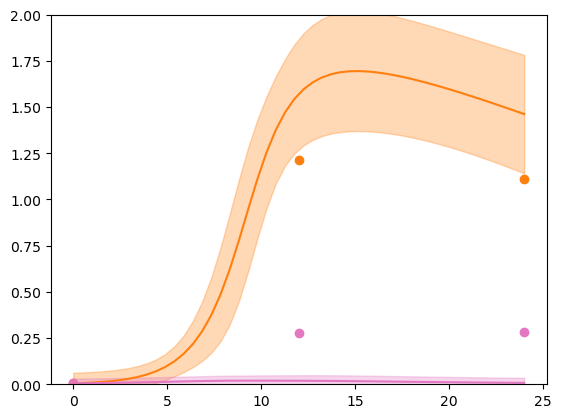

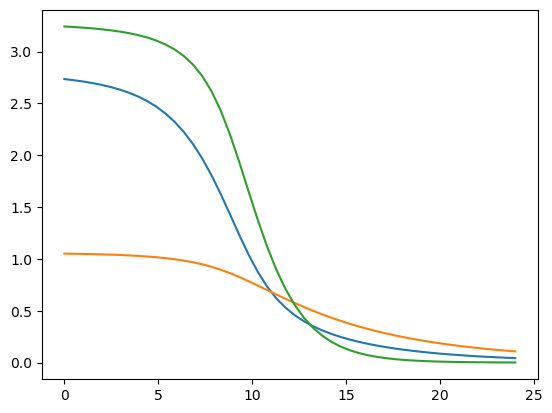

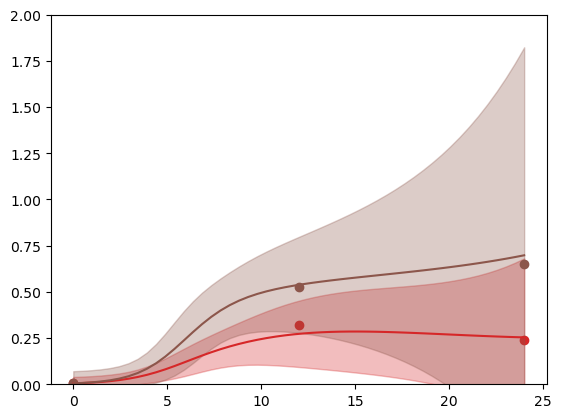

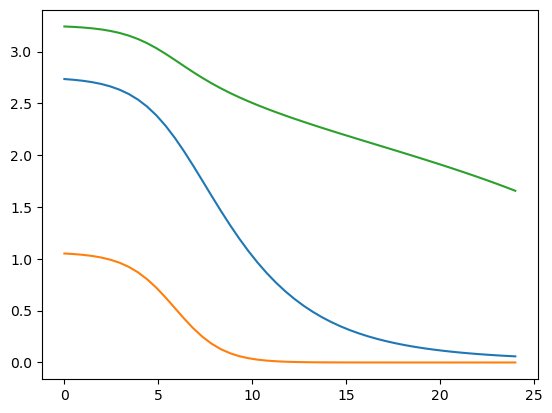

Total samples: 40, Updated regularization: 1.00e-03
Loss: 17.687, Residuals: -0.854
Loss: 11.726, Residuals: -0.524
Loss: 10.280, Residuals: -0.476
Loss: 7.770, Residuals: -0.385
Loss: 6.267, Residuals: -0.238
Loss: 5.531, Residuals: -0.220
Loss: 4.787, Residuals: -0.304
Loss: 4.506, Residuals: -0.171
Loss: 4.012, Residuals: -0.187
Loss: 3.920, Residuals: -0.157
Loss: 3.352, Residuals: -0.178
Loss: 3.090, Residuals: -0.108
Loss: 3.052, Residuals: -0.096
Loss: 2.980, Residuals: -0.096
Loss: 2.859, Residuals: -0.104
Loss: 2.672, Residuals: -0.119
Loss: 2.654, Residuals: -0.105
Optimization terminated successfully.
Evidence -235.511
Updating precision...
Total samples: 40, Updated regularization: 1.61e-03
Loss: 8.319, Residuals: -0.060
Loss: 8.061, Residuals: -0.065
Loss: 7.647, Residuals: -0.081
Loss: 7.610, Residuals: -0.056
Optimization terminated successfully.
Evidence -74.386
Updating precision...
Total samples: 40, Updated regularization: 2.31e-03
Loss: 18.004, Residuals: -0.071
Los

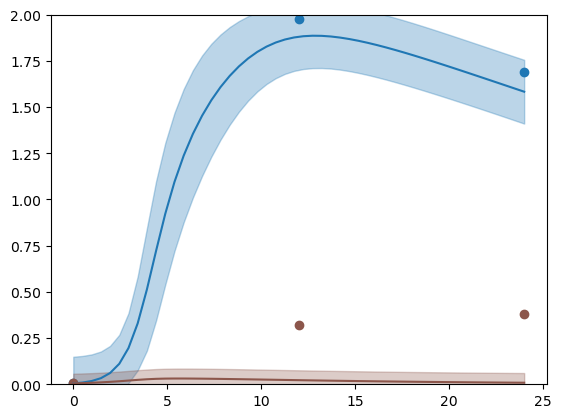

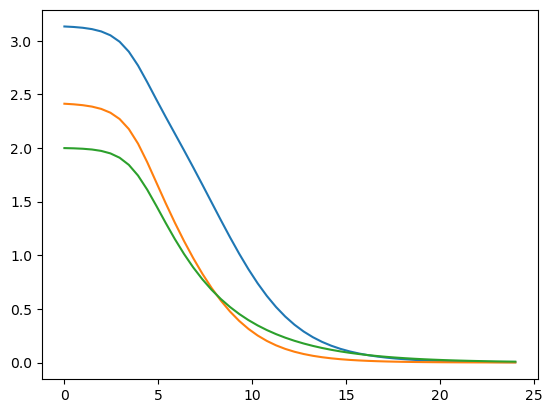

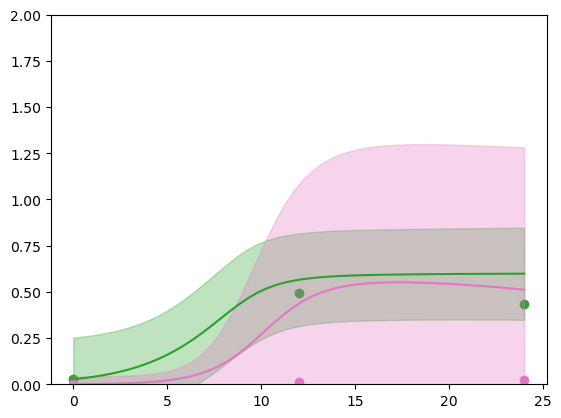

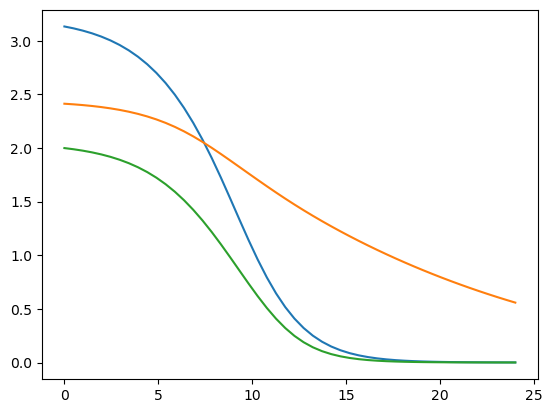

Total samples: 40, Updated regularization: 1.00e-03
Loss: 15.715, Residuals: -0.779
Loss: 13.971, Residuals: -0.943
Loss: 12.910, Residuals: -0.771
Loss: 7.895, Residuals: -0.703
Loss: 6.067, Residuals: -0.341
Loss: 5.783, Residuals: -0.252
Loss: 5.326, Residuals: -0.203
Loss: 4.763, Residuals: -0.208
Loss: 4.617, Residuals: -0.244
Loss: 4.385, Residuals: -0.169
Loss: 3.980, Residuals: -0.161
Loss: 3.675, Residuals: -0.112
Loss: 3.348, Residuals: -0.081
Loss: 3.278, Residuals: -0.093
Loss: 3.145, Residuals: -0.097
Loss: 2.937, Residuals: -0.084
Loss: 2.834, Residuals: -0.096
Loss: 2.813, Residuals: -0.069
Loss: 2.682, Residuals: -0.118
Loss: 2.613, Residuals: -0.059
Loss: 2.513, Residuals: -0.075
Loss: 2.506, Residuals: -0.071
Optimization terminated successfully.
Evidence -221.555
Updating precision...
Total samples: 40, Updated regularization: 1.56e-03
Loss: 8.971, Residuals: -0.041
Loss: 8.690, Residuals: -0.048
Loss: 8.663, Residuals: -0.039
Optimization terminated successfully.
Ev

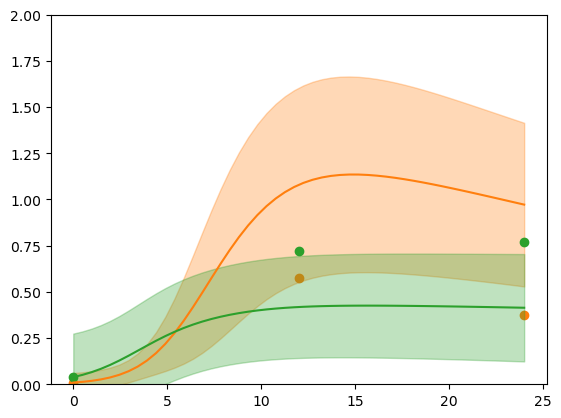

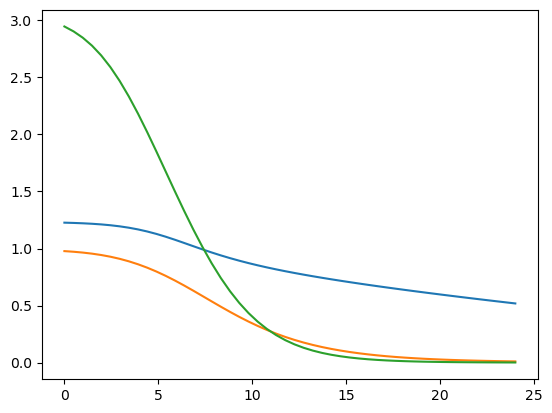

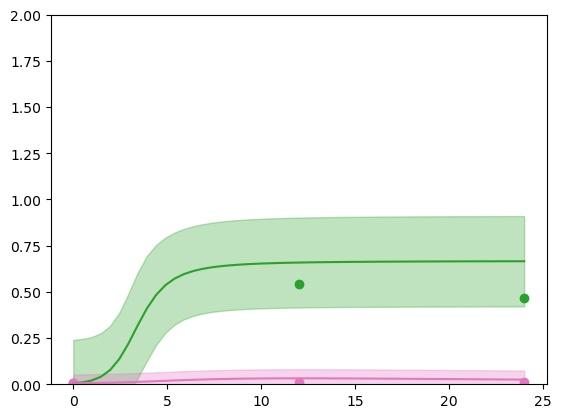

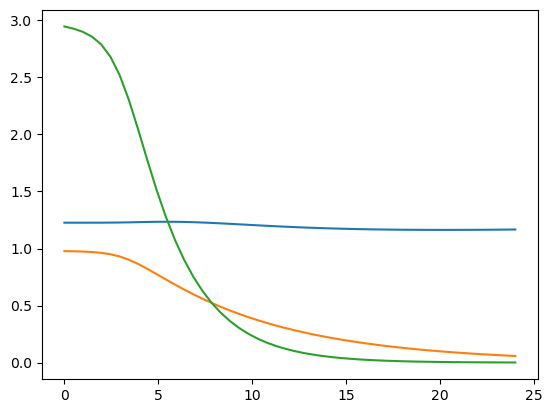

Total samples: 38, Updated regularization: 1.00e-03
Loss: 44.560, Residuals: -1.695
Loss: 16.843, Residuals: -1.319
Loss: 14.260, Residuals: -0.764
Loss: 10.880, Residuals: -0.690
Loss: 9.088, Residuals: -0.511
Loss: 8.099, Residuals: -0.472
Loss: 6.444, Residuals: -0.429
Loss: 6.044, Residuals: -0.259
Loss: 5.380, Residuals: -0.175
Loss: 4.874, Residuals: -0.170
Loss: 4.642, Residuals: -0.085
Loss: 4.220, Residuals: -0.112
Loss: 4.170, Residuals: -0.084
Loss: 3.717, Residuals: -0.111
Loss: 3.513, Residuals: -0.116
Loss: 3.498, Residuals: -0.095
Optimization terminated successfully.
Evidence -198.875
Updating precision...
Total samples: 38, Updated regularization: 1.46e-03
Loss: 10.933, Residuals: -0.114
Loss: 10.881, Residuals: -0.097
Optimization terminated successfully.
Evidence -14.965
Updating precision...
Total samples: 38, Updated regularization: 1.88e-03
Loss: 25.361, Residuals: -0.111
Loss: 25.289, Residuals: -0.101
Optimization terminated successfully.
Evidence 116.530
Updati

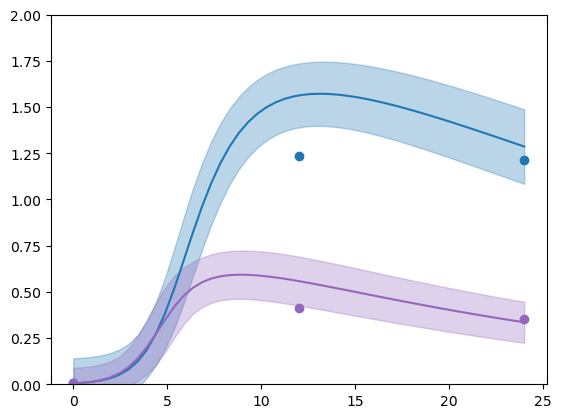

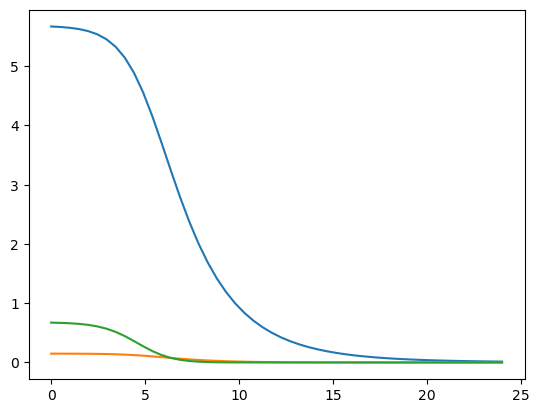

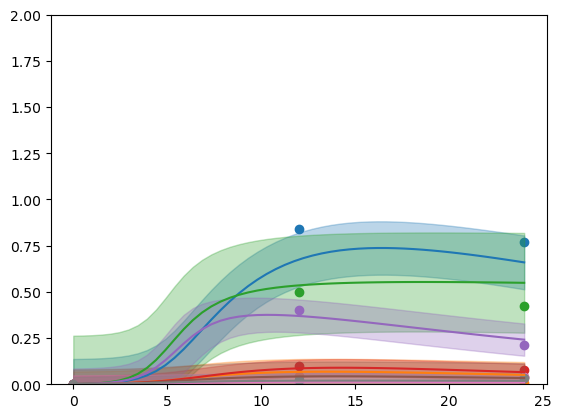

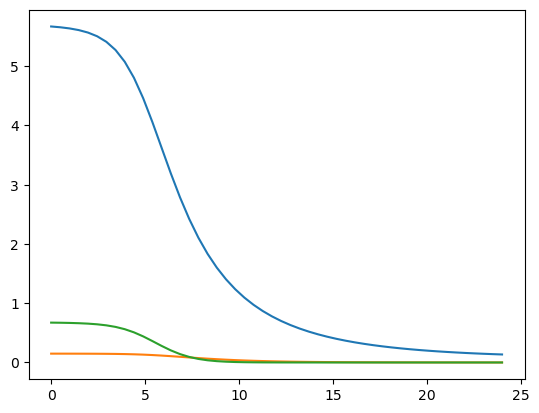

Total samples: 40, Updated regularization: 1.00e-03
Loss: 14.205, Residuals: -0.761
Loss: 9.274, Residuals: -0.827
Loss: 8.011, Residuals: -0.628
Loss: 6.290, Residuals: -0.421
Loss: 6.134, Residuals: -0.424
Loss: 5.836, Residuals: -0.395
Loss: 5.298, Residuals: -0.341
Loss: 4.422, Residuals: -0.315
Loss: 4.161, Residuals: -0.141
Loss: 3.687, Residuals: -0.144
Loss: 3.354, Residuals: -0.141
Loss: 3.276, Residuals: -0.074
Loss: 3.168, Residuals: -0.072
Loss: 2.971, Residuals: -0.076
Loss: 2.698, Residuals: -0.099
Loss: 2.675, Residuals: -0.086
Optimization terminated successfully.
Evidence -220.812
Updating precision...
Total samples: 40, Updated regularization: 1.55e-03
Loss: 8.867, Residuals: -0.061
Loss: 8.634, Residuals: -0.066
Loss: 8.608, Residuals: -0.052
Loss: 8.215, Residuals: -0.073
Loss: 8.146, Residuals: -0.058
Optimization terminated successfully.
Evidence -48.142
Updating precision...
Total samples: 40, Updated regularization: 2.21e-03
Loss: 18.005, Residuals: -0.076
Loss:

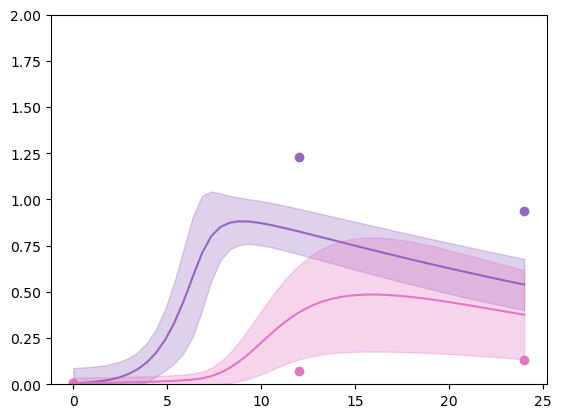

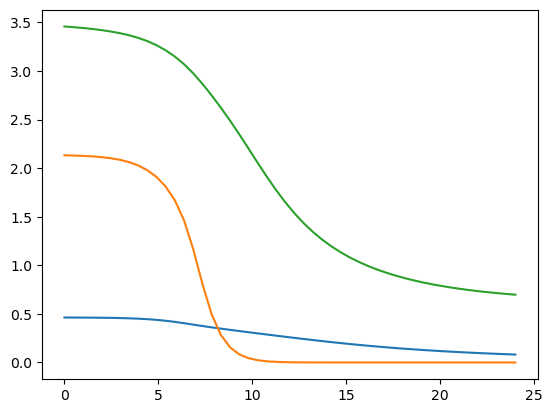

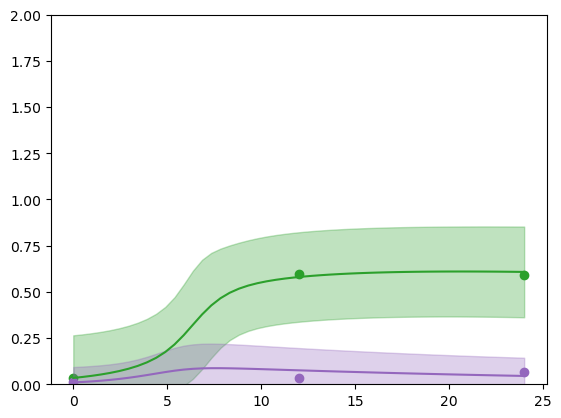

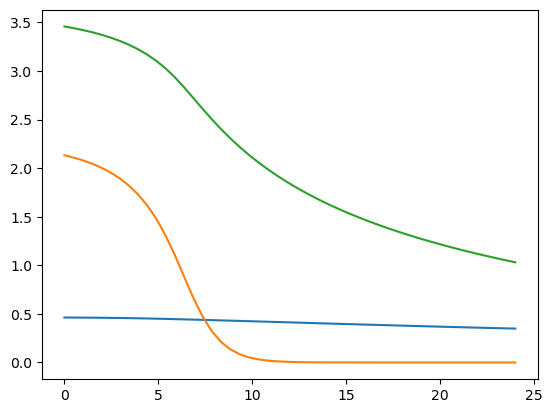

Total samples: 40, Updated regularization: 1.00e-03
Loss: 43.956, Residuals: -1.777
Loss: 13.328, Residuals: -0.767
Loss: 8.275, Residuals: -0.623
Loss: 7.288, Residuals: -0.342
Loss: 5.960, Residuals: -0.417
Loss: 5.402, Residuals: -0.238
Loss: 4.966, Residuals: -0.172
Loss: 4.591, Residuals: -0.140
Loss: 4.433, Residuals: -0.030
Loss: 4.170, Residuals: -0.077
Loss: 4.112, Residuals: -0.031
Optimization terminated successfully.
Evidence -172.932
Updating precision...
Total samples: 40, Updated regularization: 1.42e-03
Loss: 14.282, Residuals: -0.035
Loss: 12.263, Residuals: 0.032
Loss: 11.853, Residuals: -0.018
Optimization terminated successfully.
Evidence -22.465
Updating precision...
Total samples: 40, Updated regularization: 1.98e-03
Loss: 27.385, Residuals: -0.031
Loss: 27.160, Residuals: -0.012
Loss: 25.427, Residuals: -0.046
Loss: 24.954, Residuals: -0.015
Optimization terminated successfully.
Evidence 111.624
Updating precision...
Total samples: 40, Updated regularization: 2.4

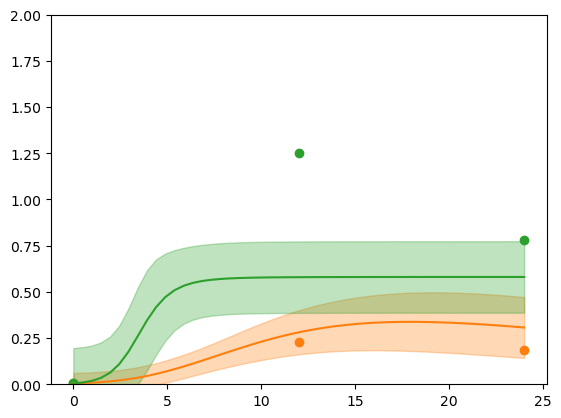

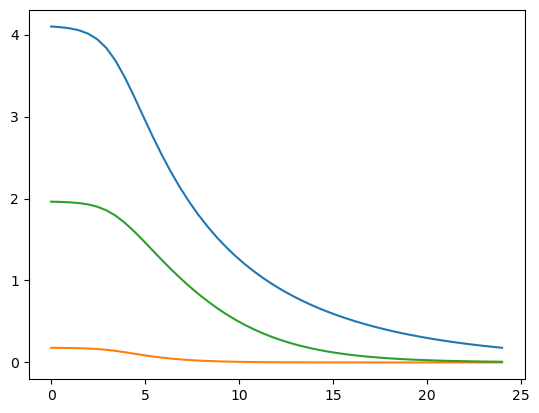

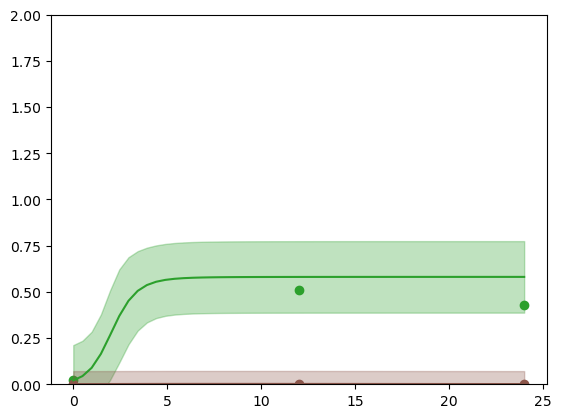

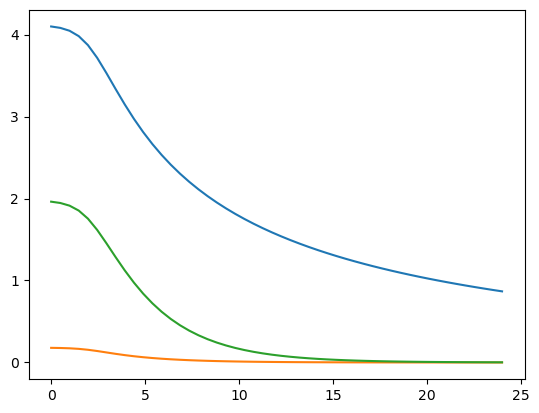

Total samples: 39, Updated regularization: 1.00e-03
Loss: 25.728, Residuals: -1.495
Loss: 17.441, Residuals: -1.114
Loss: 13.221, Residuals: -0.720
Loss: 9.893, Residuals: -0.715
Loss: 8.515, Residuals: -0.410
Loss: 6.333, Residuals: -0.402
Loss: 5.357, Residuals: -0.313
Loss: 5.131, Residuals: -0.170
Loss: 4.717, Residuals: -0.173
Loss: 3.931, Residuals: -0.165
Loss: 3.853, Residuals: -0.126
Loss: 3.502, Residuals: -0.140
Loss: 3.283, Residuals: -0.141
Loss: 3.187, Residuals: -0.066
Loss: 3.013, Residuals: -0.073
Loss: 2.864, Residuals: -0.079
Loss: 2.839, Residuals: -0.082
Optimization terminated successfully.
Evidence -227.935
Updating precision...
Total samples: 39, Updated regularization: 1.57e-03
Loss: 8.940, Residuals: -0.080
Loss: 8.568, Residuals: -0.079
Loss: 8.495, Residuals: -0.080
Optimization terminated successfully.
Evidence -57.266
Updating precision...
Total samples: 39, Updated regularization: 2.12e-03
Loss: 19.771, Residuals: -0.055
Loss: 19.013, Residuals: -0.061
Lo

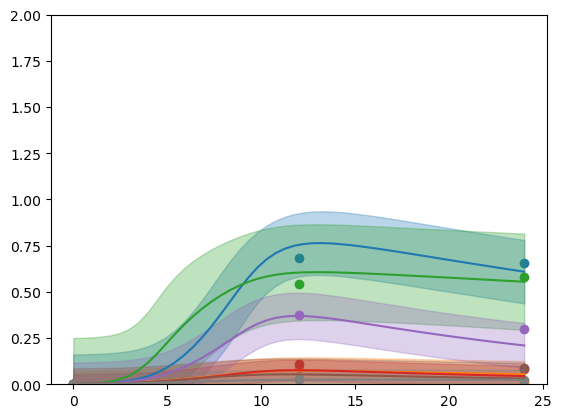

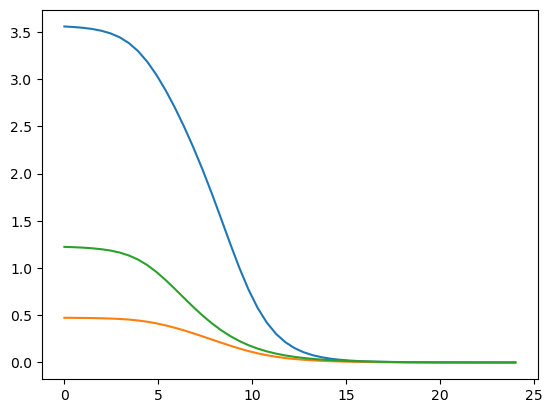

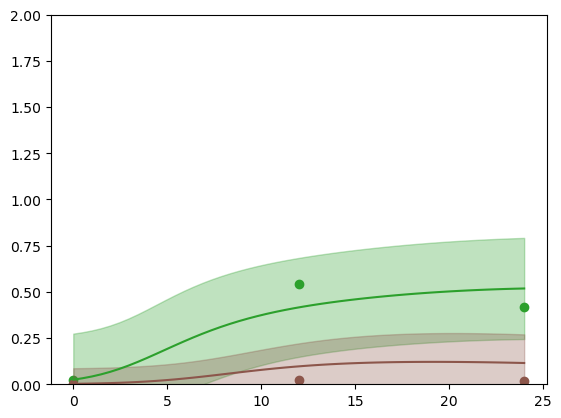

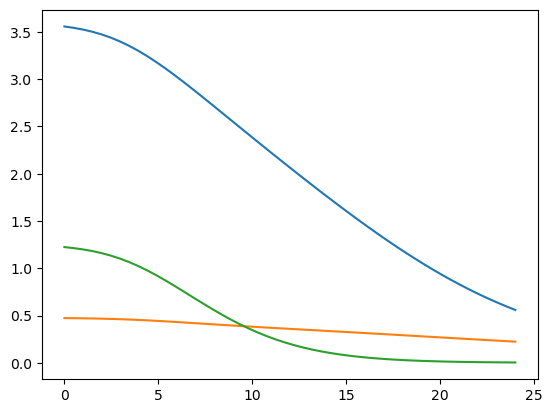

Total samples: 40, Updated regularization: 1.00e-03
Loss: 22.611, Residuals: -1.016
Loss: 16.483, Residuals: -1.218
Loss: 13.872, Residuals: -0.786
Loss: 8.263, Residuals: -0.675
Loss: 6.335, Residuals: -0.539
Loss: 5.962, Residuals: -0.394
Loss: 5.343, Residuals: -0.404
Loss: 4.857, Residuals: -0.401
Loss: 4.786, Residuals: -0.348
Loss: 4.093, Residuals: -0.365
Loss: 3.805, Residuals: -0.279
Loss: 3.653, Residuals: -0.219
Loss: 3.503, Residuals: -0.101
Loss: 3.419, Residuals: -0.103
Loss: 3.257, Residuals: -0.105
Loss: 2.990, Residuals: -0.102
Loss: 2.839, Residuals: -0.098
Loss: 2.800, Residuals: -0.088
Loss: 2.726, Residuals: -0.094
Loss: 2.717, Residuals: -0.084
Loss: 2.632, Residuals: -0.091
Loss: 2.628, Residuals: -0.081
Optimization terminated successfully.
Evidence -198.861
Updating precision...
Total samples: 40, Updated regularization: 1.43e-03
Loss: 9.869, Residuals: -0.082
Loss: 9.852, Residuals: -0.064
Optimization terminated successfully.
Evidence 17.488
Updating precisio

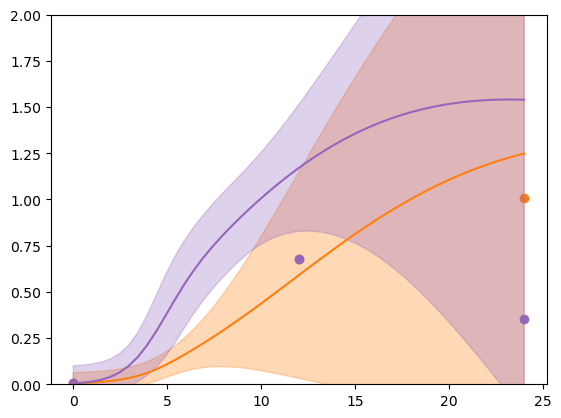

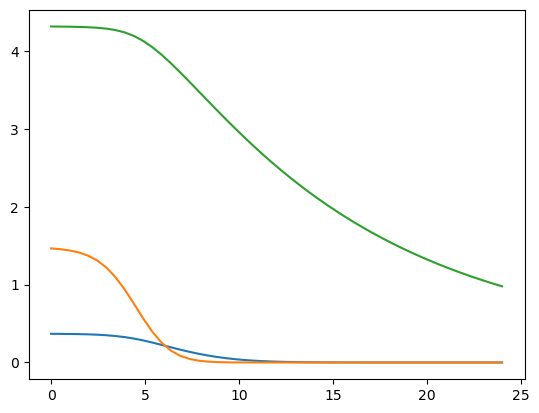

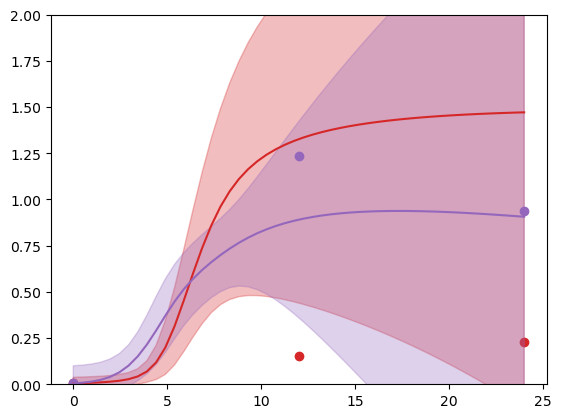

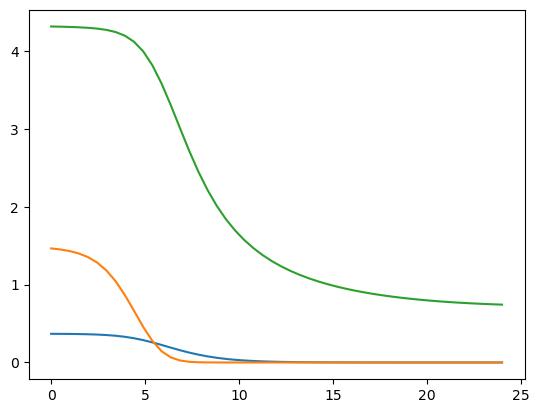

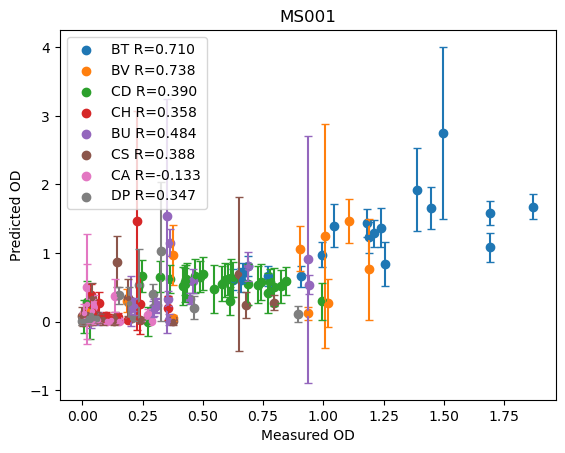

Total samples: 38, Updated regularization: 1.00e-03
Loss: 33.484, Residuals: -1.301
Loss: 13.760, Residuals: -1.155
Loss: 9.868, Residuals: -1.050
Loss: 7.274, Residuals: -0.474
Loss: 6.429, Residuals: -0.596
Loss: 5.882, Residuals: -0.515
Loss: 4.919, Residuals: -0.408
Loss: 4.194, Residuals: -0.366
Loss: 3.603, Residuals: -0.243
Loss: 3.479, Residuals: -0.128
Loss: 3.243, Residuals: -0.127
Loss: 2.864, Residuals: -0.121
Loss: 2.831, Residuals: -0.078
Loss: 2.556, Residuals: -0.096
Loss: 2.524, Residuals: -0.079
Optimization terminated successfully.
Evidence -223.784
Updating precision...
Total samples: 38, Updated regularization: 1.59e-03
Loss: 6.979, Residuals: -0.081
Loss: 6.888, Residuals: -0.070
Loss: 6.131, Residuals: -0.084
Loss: 6.115, Residuals: -0.079
Optimization terminated successfully.
Evidence -69.075
Updating precision...
Total samples: 38, Updated regularization: 2.26e-03
Loss: 14.799, Residuals: -0.086
Loss: 14.653, Residuals: -0.039
Loss: 13.218, Residuals: -0.061
Lo

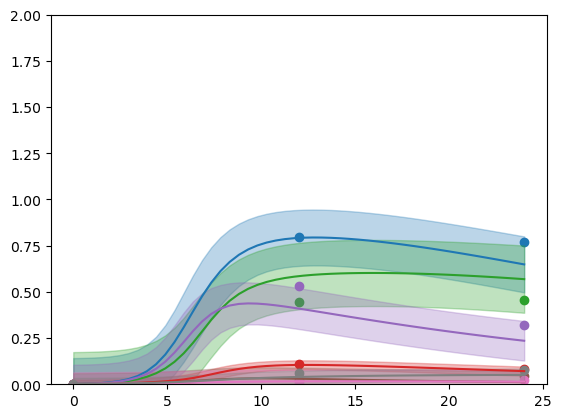

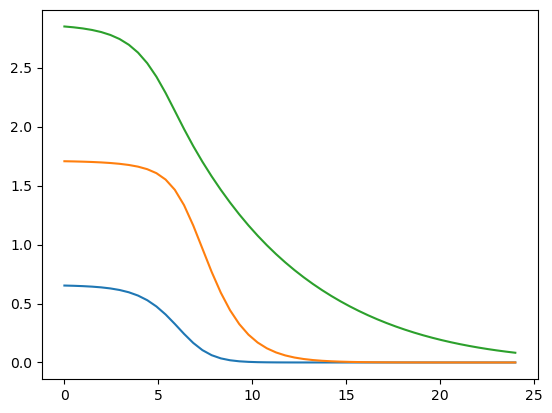

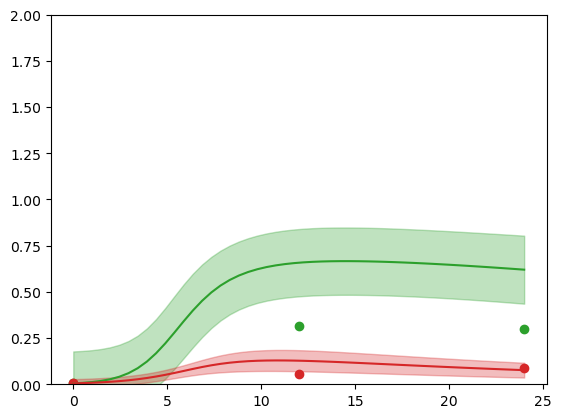

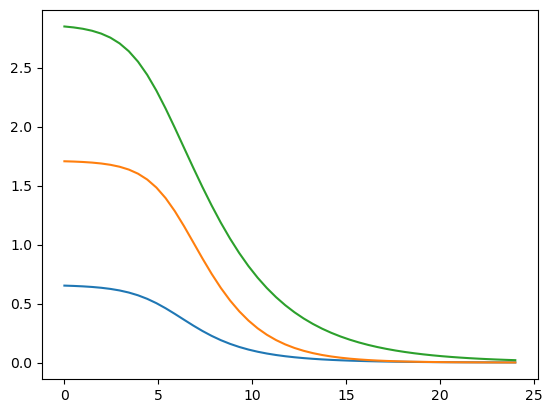

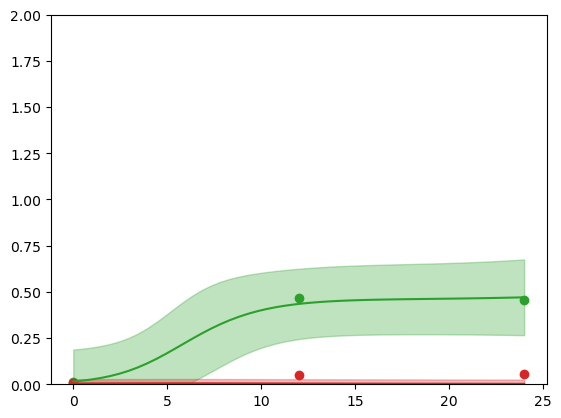

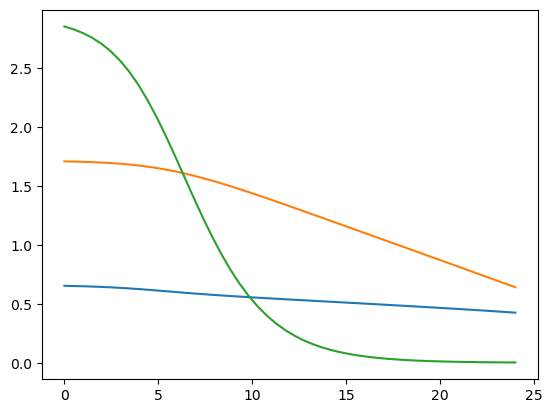

Total samples: 38, Updated regularization: 1.00e-03
Loss: 17.183, Residuals: -0.717
Loss: 11.258, Residuals: -0.660
Loss: 9.804, Residuals: -0.362
Loss: 8.262, Residuals: -0.355
Loss: 5.772, Residuals: -0.376
Loss: 5.177, Residuals: -0.161
Loss: 4.828, Residuals: -0.210
Loss: 4.138, Residuals: -0.180
Loss: 3.407, Residuals: -0.175
Loss: 3.200, Residuals: -0.225
Loss: 2.909, Residuals: -0.151
Loss: 2.476, Residuals: -0.139
Loss: 2.424, Residuals: -0.069
Loss: 2.183, Residuals: -0.097
Loss: 2.162, Residuals: -0.076
Loss: 2.005, Residuals: -0.078
Loss: 1.976, Residuals: -0.054
Loss: 1.922, Residuals: -0.059
Loss: 1.848, Residuals: -0.062
Loss: 1.842, Residuals: -0.045
Optimization terminated successfully.
Evidence -244.088
Updating precision...
Total samples: 38, Updated regularization: 1.66e-03
Loss: 5.947, Residuals: -0.066
Loss: 5.911, Residuals: -0.054
Optimization terminated successfully.
Evidence -80.657
Updating precision...
Total samples: 38, Updated regularization: 2.34e-03
Loss:

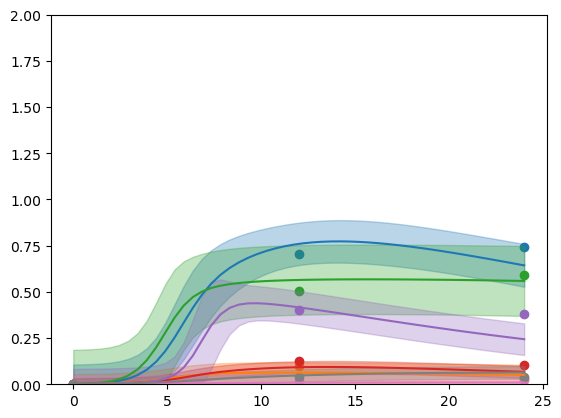

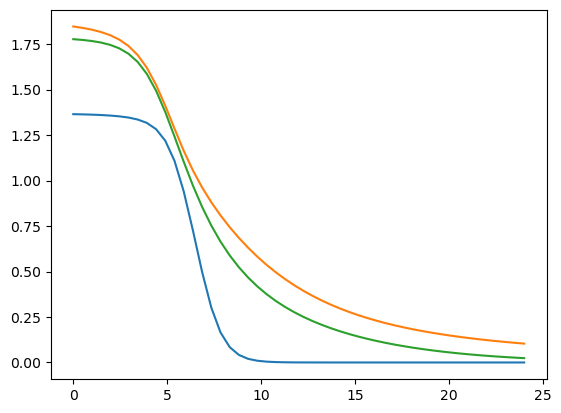

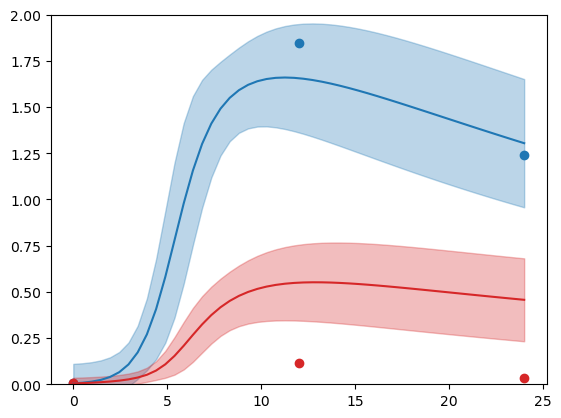

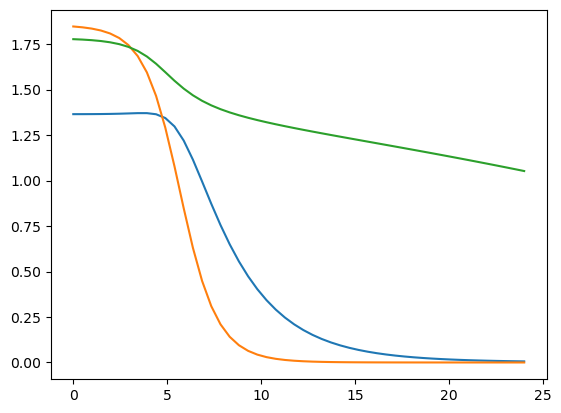

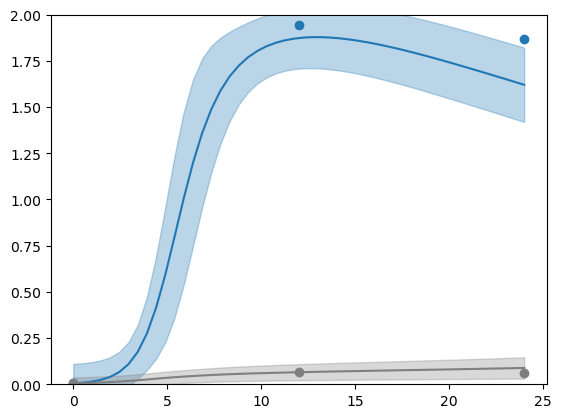

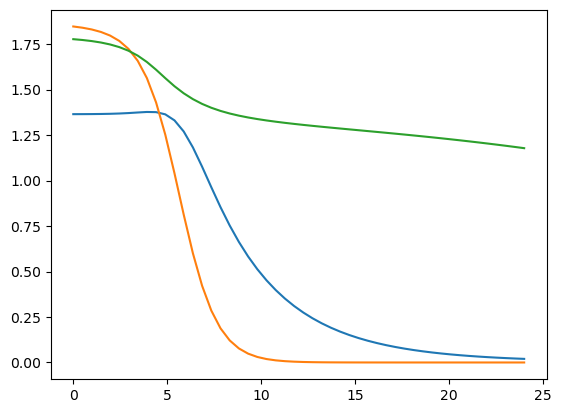

Total samples: 40, Updated regularization: 1.00e-03
Loss: 13.101, Residuals: -0.770
Loss: 7.965, Residuals: -0.785
Loss: 5.408, Residuals: -0.162
Loss: 4.698, Residuals: -0.091
Loss: 4.576, Residuals: -0.151
Loss: 3.718, Residuals: -0.131
Loss: 3.496, Residuals: -0.127
Loss: 3.440, Residuals: -0.107
Optimization terminated successfully.
Evidence -220.316
Updating precision...
Total samples: 40, Updated regularization: 1.54e-03
Loss: 9.345, Residuals: -0.113
Loss: 9.239, Residuals: -0.073
Optimization terminated successfully.
Evidence -37.126
Updating precision...
Total samples: 40, Updated regularization: 2.02e-03
Loss: 22.607, Residuals: -0.084
Loss: 22.450, Residuals: -0.075
Optimization terminated successfully.
Evidence 108.249
Updating precision...
Total samples: 40, Updated regularization: 2.49e-03
Loss: 44.335, Residuals: -0.085
Loss: 44.154, Residuals: -0.075
Optimization terminated successfully.
Evidence 214.394
Updating precision...
Total samples: 40, Updated regularization: 2

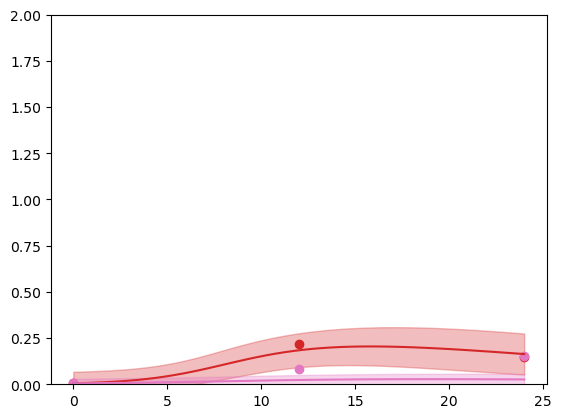

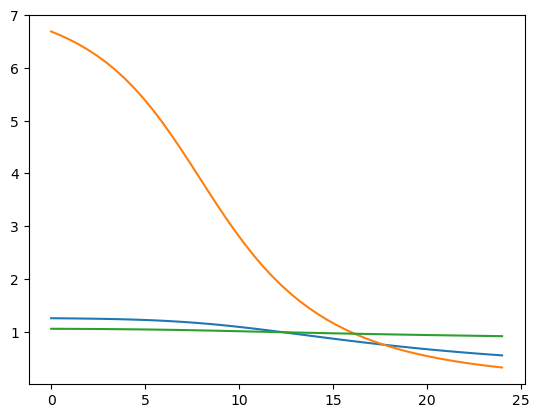

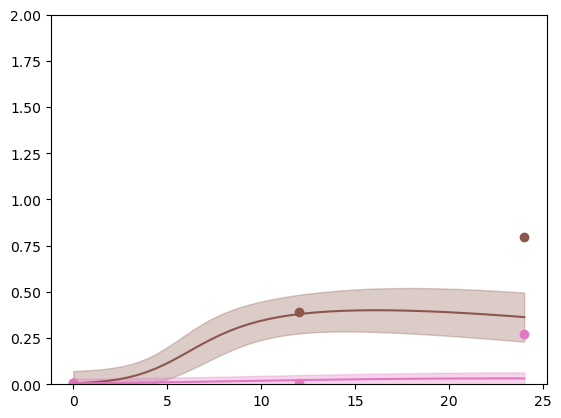

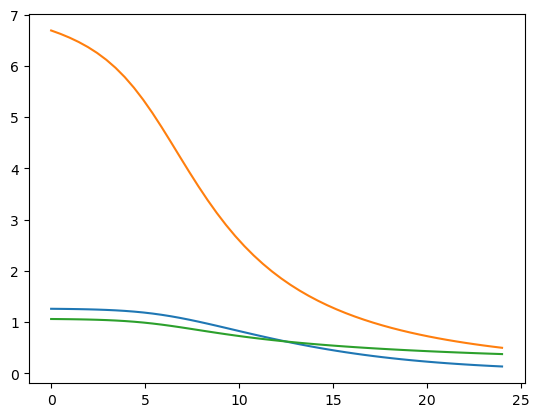

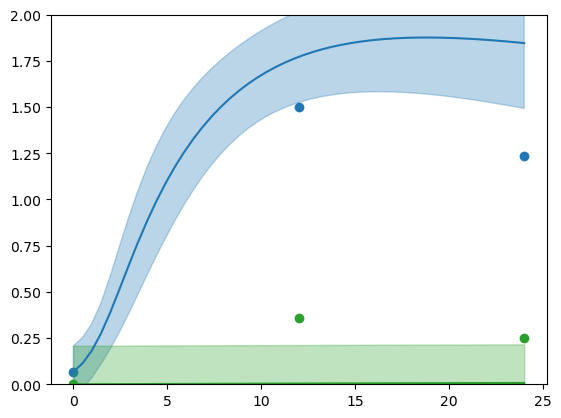

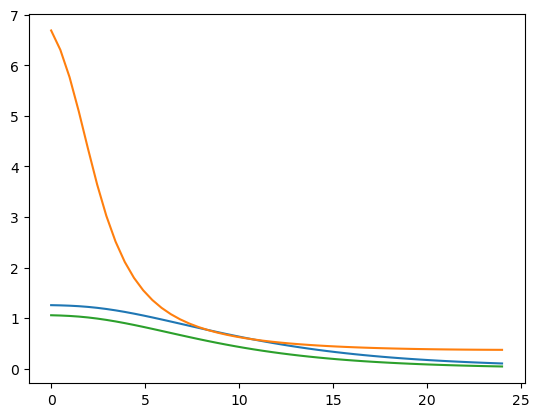

Total samples: 40, Updated regularization: 1.00e-03
Loss: 17.037, Residuals: -0.567
Loss: 14.162, Residuals: -1.001
Loss: 11.560, Residuals: -0.893
Loss: 11.283, Residuals: -0.747
Loss: 10.063, Residuals: -0.717
Loss: 9.623, Residuals: -0.593
Loss: 9.496, Residuals: -0.601
Loss: 6.194, Residuals: -0.568
Loss: 4.658, Residuals: -0.168
Loss: 4.325, Residuals: -0.168
Loss: 3.229, Residuals: -0.177
Loss: 3.140, Residuals: -0.182
Optimization terminated successfully.
Evidence -207.493
Updating precision...
Total samples: 40, Updated regularization: 1.51e-03
Loss: 10.230, Residuals: -0.118
Loss: 8.639, Residuals: -0.160
Loss: 8.414, Residuals: -0.113
Loss: 7.381, Residuals: -0.123
Loss: 7.218, Residuals: -0.094
Loss: 6.907, Residuals: -0.096
Loss: 6.521, Residuals: -0.101
Loss: 6.484, Residuals: -0.077
Optimization terminated successfully.
Evidence -58.576
Updating precision...
Total samples: 40, Updated regularization: 2.24e-03
Loss: 15.134, Residuals: -0.084
Loss: 15.070, Residuals: -0.086

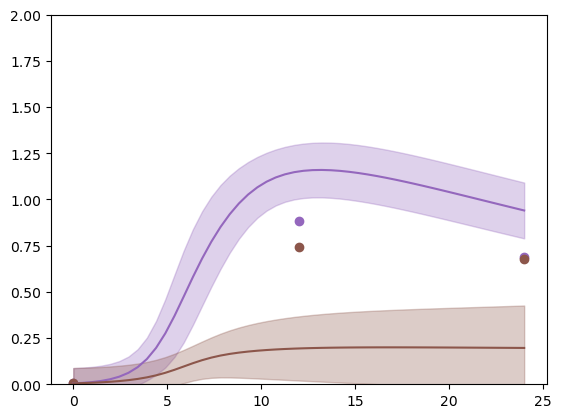

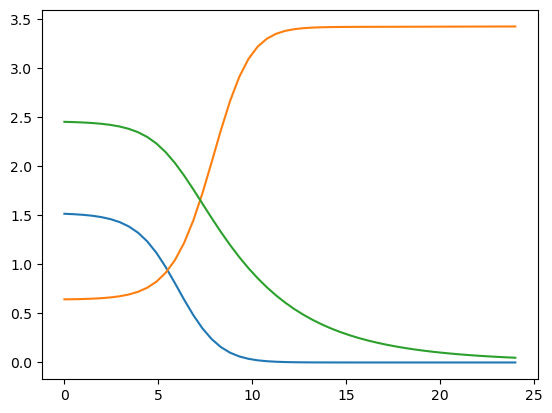

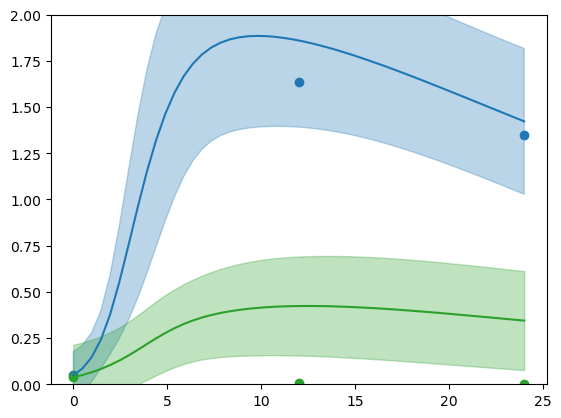

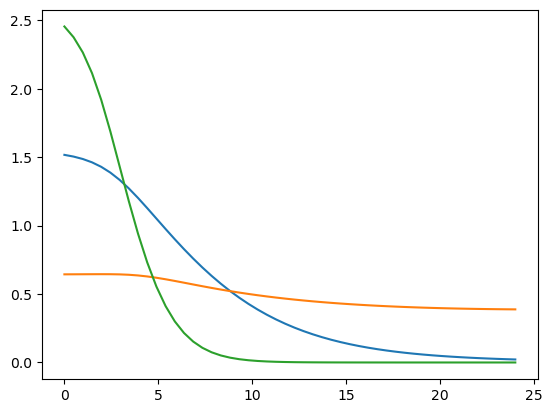

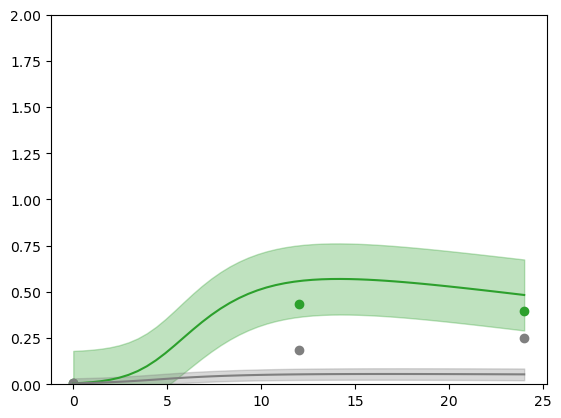

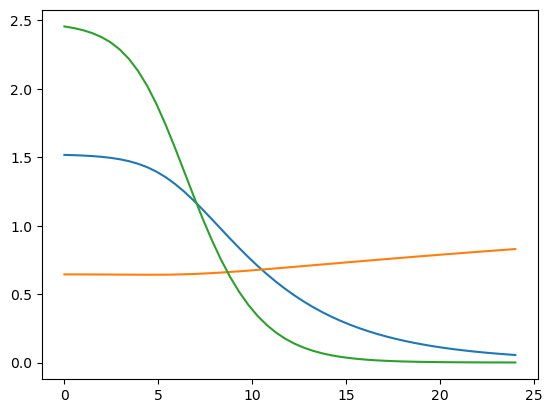

Total samples: 40, Updated regularization: 1.00e-03
Loss: 40.853, Residuals: -1.835
Loss: 15.785, Residuals: -0.574
Loss: 13.803, Residuals: -0.922
Loss: 12.044, Residuals: -1.015
Loss: 8.812, Residuals: -0.832
Loss: 6.216, Residuals: -0.508
Loss: 5.551, Residuals: -0.189
Loss: 4.512, Residuals: -0.189
Loss: 4.133, Residuals: -0.090
Loss: 3.547, Residuals: -0.183
Loss: 3.398, Residuals: -0.103
Loss: 3.122, Residuals: -0.114
Loss: 2.917, Residuals: -0.117
Loss: 2.876, Residuals: -0.060
Loss: 2.687, Residuals: -0.075
Loss: 2.600, Residuals: -0.067
Loss: 2.444, Residuals: -0.070
Loss: 2.352, Residuals: -0.086
Loss: 2.345, Residuals: -0.073
Optimization terminated successfully.
Evidence -200.748
Updating precision...
Total samples: 40, Updated regularization: 1.46e-03
Loss: 8.503, Residuals: -0.076
Loss: 8.470, Residuals: -0.064
Optimization terminated successfully.
Evidence -2.503
Updating precision...
Total samples: 40, Updated regularization: 1.88e-03
Loss: 22.467, Residuals: -0.074
Los

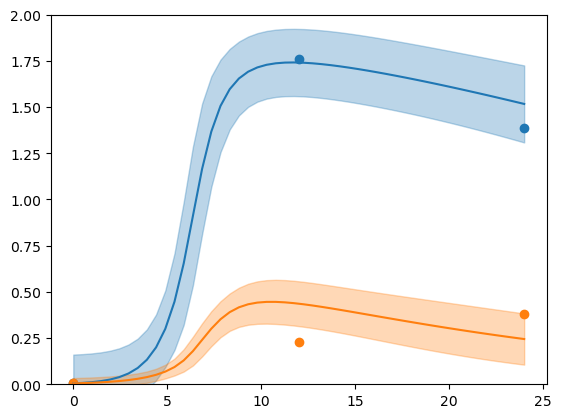

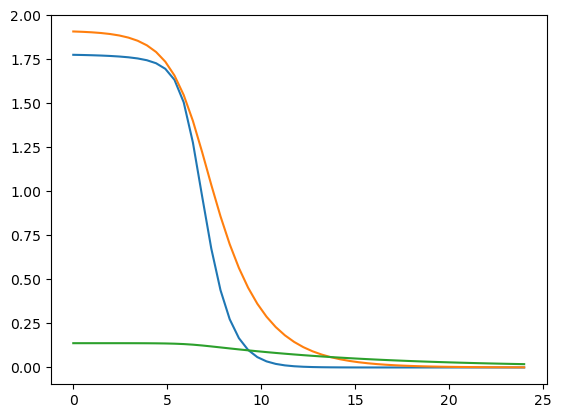

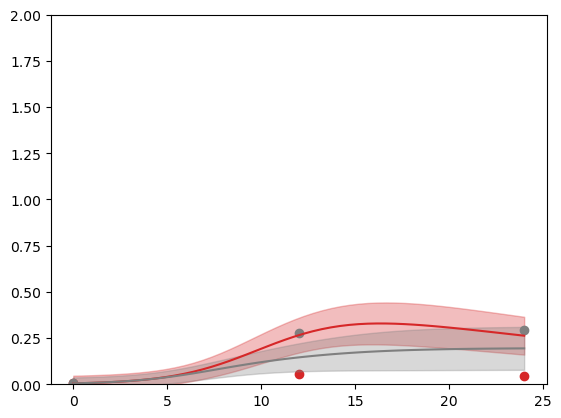

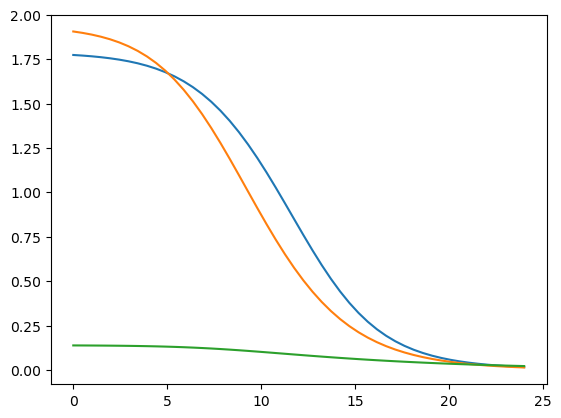

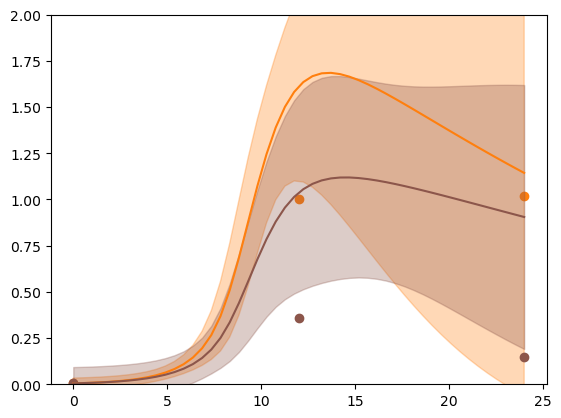

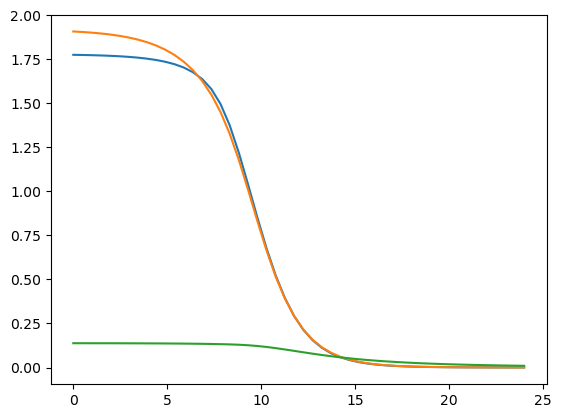

Total samples: 37, Updated regularization: 1.00e-03
Loss: 14.821, Residuals: -1.111
Loss: 13.479, Residuals: -0.954
Loss: 10.556, Residuals: -0.990
Loss: 7.756, Residuals: -0.494
Loss: 6.530, Residuals: -0.271
Loss: 5.469, Residuals: -0.319
Loss: 4.950, Residuals: -0.127
Loss: 4.240, Residuals: -0.213
Loss: 4.143, Residuals: -0.122
Loss: 3.951, Residuals: -0.133
Loss: 3.645, Residuals: -0.170
Loss: 3.594, Residuals: -0.134
Loss: 3.320, Residuals: -0.158
Loss: 3.284, Residuals: -0.129
Optimization terminated successfully.
Evidence -169.882
Updating precision...
Total samples: 37, Updated regularization: 1.38e-03
Loss: 15.109, Residuals: -0.130
Loss: 14.628, Residuals: -0.127
Loss: 14.505, Residuals: -0.107
Optimization terminated successfully.
Evidence 1.078
Updating precision...
Total samples: 37, Updated regularization: 1.80e-03
Loss: 31.279, Residuals: -0.116
Loss: 30.616, Residuals: -0.123
Loss: 30.379, Residuals: -0.083
Optimization terminated successfully.
Evidence 100.928
Updatin

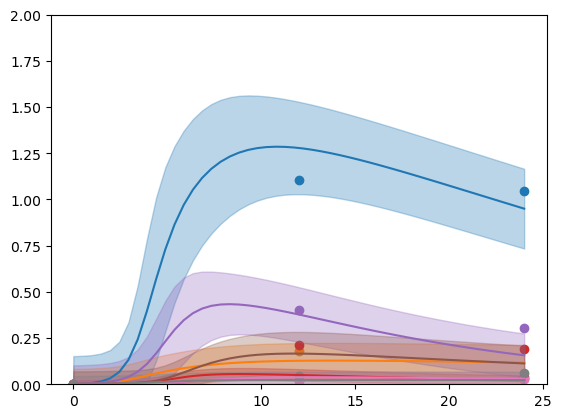

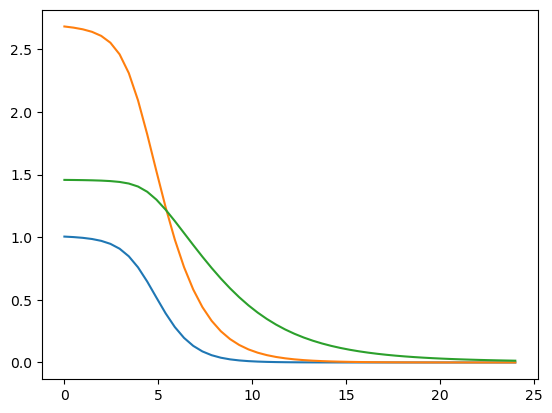

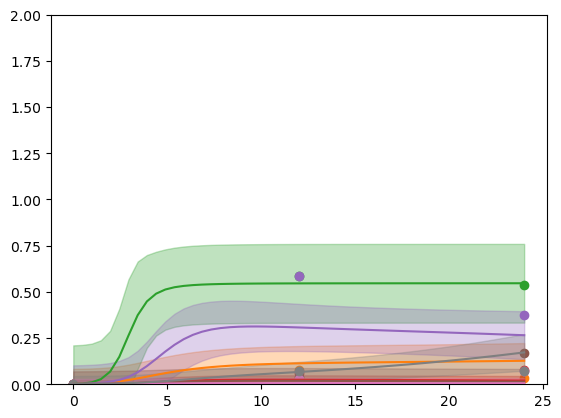

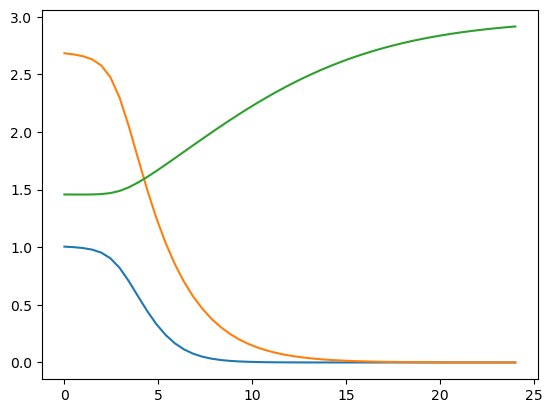

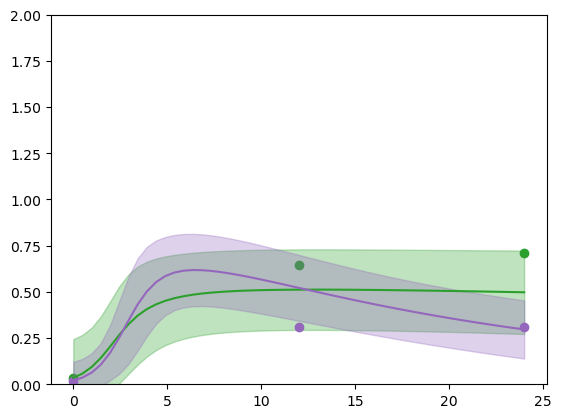

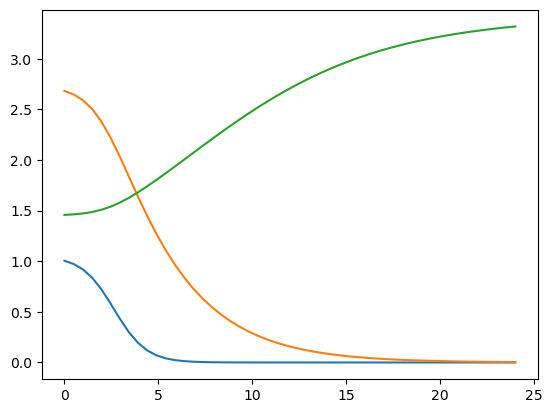

Total samples: 40, Updated regularization: 1.00e-03
Loss: 17.252, Residuals: -0.903
Loss: 12.585, Residuals: -0.870
Loss: 8.824, Residuals: -0.580
Loss: 7.973, Residuals: -0.334
Loss: 6.287, Residuals: -0.320
Loss: 5.203, Residuals: -0.265
Loss: 4.725, Residuals: -0.324
Loss: 4.251, Residuals: -0.289
Loss: 4.017, Residuals: -0.267
Loss: 3.677, Residuals: -0.266
Loss: 3.541, Residuals: -0.227
Loss: 3.288, Residuals: -0.209
Loss: 2.986, Residuals: -0.178
Loss: 2.935, Residuals: -0.166
Optimization terminated successfully.
Evidence -199.958
Updating precision...
Total samples: 40, Updated regularization: 1.47e-03
Loss: 11.979, Residuals: -0.161
Loss: 11.528, Residuals: -0.064
Loss: 10.694, Residuals: -0.071
Loss: 9.696, Residuals: -0.084
Loss: 9.515, Residuals: -0.087
Optimization terminated successfully.
Evidence -11.052
Updating precision...
Total samples: 40, Updated regularization: 2.04e-03
Loss: 24.006, Residuals: -0.086
Loss: 22.856, Residuals: -0.053
Loss: 22.289, Residuals: -0.064

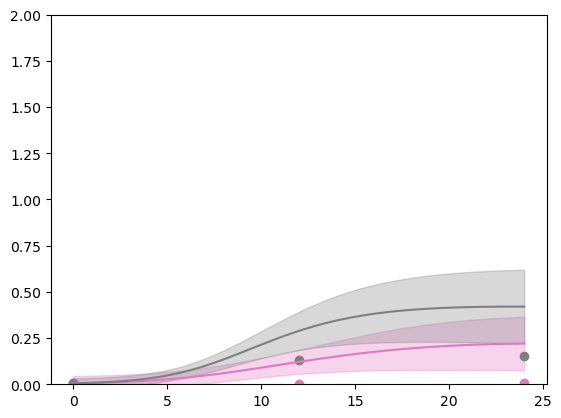

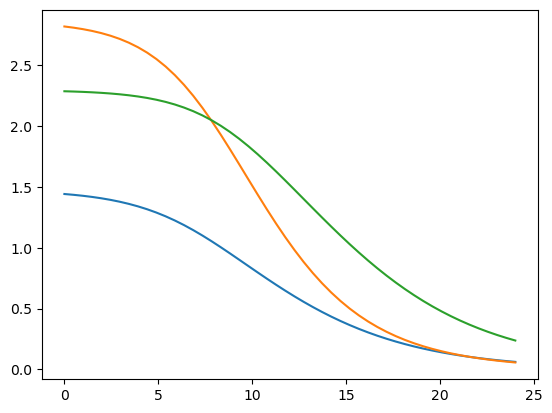

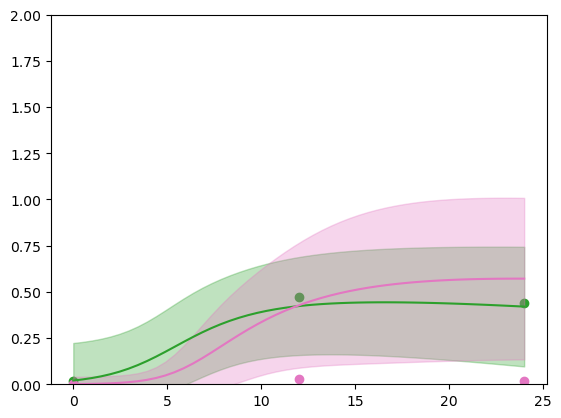

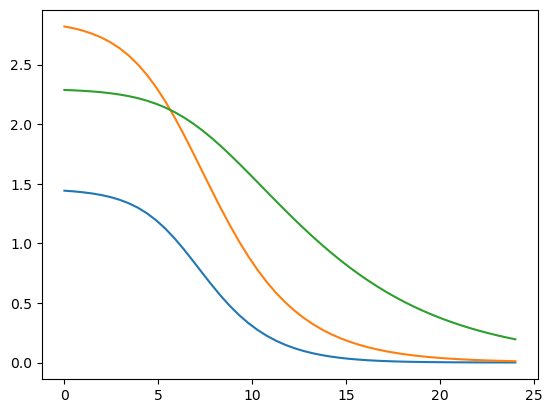

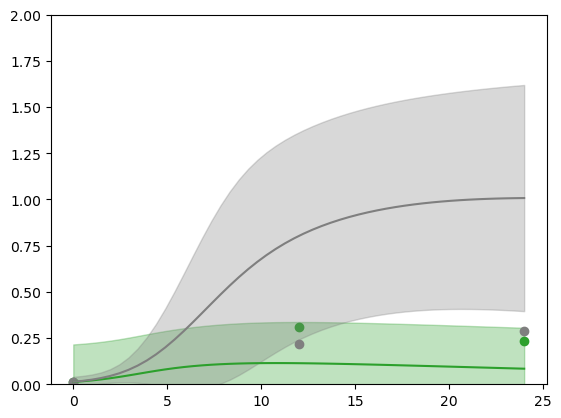

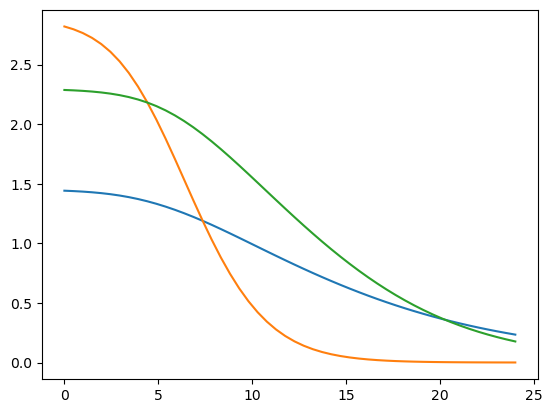

Total samples: 38, Updated regularization: 1.00e-03
Loss: 18.194, Residuals: -1.376
Loss: 13.470, Residuals: -0.899
Loss: 8.841, Residuals: -0.862
Loss: 6.494, Residuals: -0.313
Loss: 6.164, Residuals: -0.304
Loss: 5.560, Residuals: -0.318
Loss: 4.824, Residuals: -0.371
Loss: 3.922, Residuals: -0.296
Loss: 3.326, Residuals: -0.228
Loss: 3.126, Residuals: -0.140
Loss: 2.757, Residuals: -0.122
Loss: 2.346, Residuals: -0.146
Loss: 2.285, Residuals: -0.089
Loss: 2.180, Residuals: -0.088
Loss: 2.007, Residuals: -0.106
Loss: 1.972, Residuals: -0.080
Loss: 1.835, Residuals: -0.097
Loss: 1.821, Residuals: -0.087
Optimization terminated successfully.
Evidence -235.543
Updating precision...
Total samples: 38, Updated regularization: 1.63e-03
Loss: 5.735, Residuals: -0.037
Loss: 5.719, Residuals: -0.034
Optimization terminated successfully.
Evidence -79.108
Updating precision...
Total samples: 38, Updated regularization: 2.30e-03
Loss: 12.892, Residuals: -0.044
Loss: 12.030, Residuals: -0.105
Los

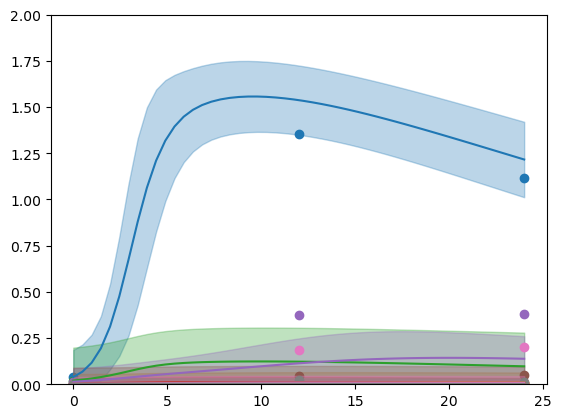

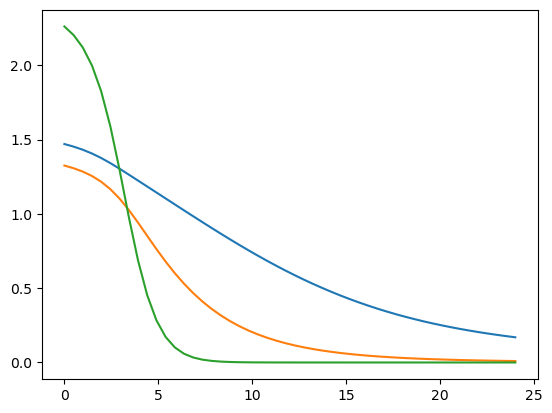

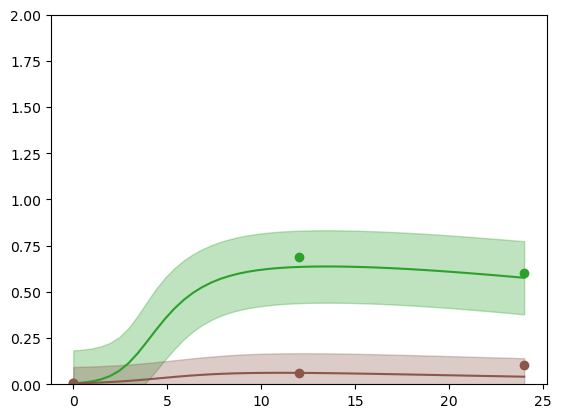

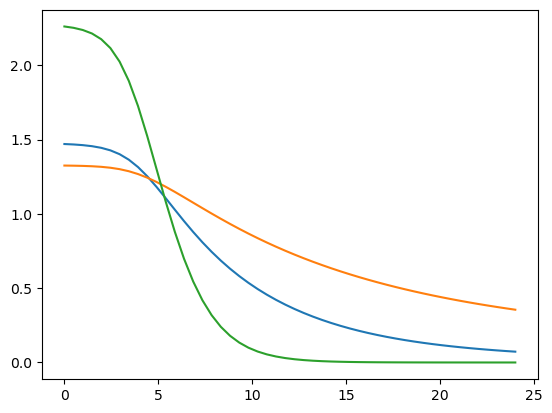

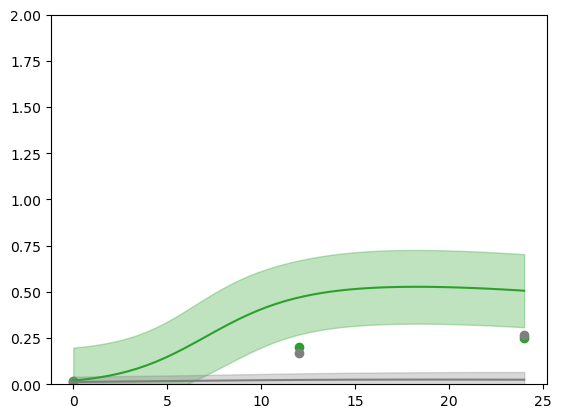

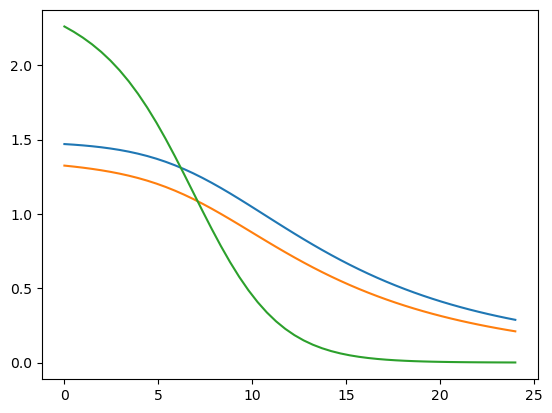

Total samples: 37, Updated regularization: 1.00e-03
Loss: 38.736, Residuals: -1.439
Loss: 11.824, Residuals: -1.162
Loss: 8.304, Residuals: -0.885
Loss: 6.800, Residuals: -0.363
Loss: 4.800, Residuals: -0.367
Loss: 4.493, Residuals: -0.199
Loss: 3.953, Residuals: -0.210
Loss: 3.559, Residuals: -0.213
Loss: 3.492, Residuals: -0.151
Loss: 2.852, Residuals: -0.165
Loss: 2.770, Residuals: -0.106
Loss: 2.211, Residuals: -0.121
Loss: 2.174, Residuals: -0.086
Optimization terminated successfully.
Evidence -212.549
Updating precision...
Total samples: 37, Updated regularization: 1.53e-03
Loss: 7.579, Residuals: -0.064
Loss: 7.099, Residuals: -0.073
Loss: 6.996, Residuals: -0.041
Loss: 6.906, Residuals: -0.051
Loss: 6.435, Residuals: -0.067
Loss: 6.365, Residuals: -0.042
Optimization terminated successfully.
Evidence -70.507
Updating precision...
Total samples: 37, Updated regularization: 2.14e-03
Loss: 14.738, Residuals: -0.029
Optimization terminated successfully.
Evidence 57.219
Updating pre

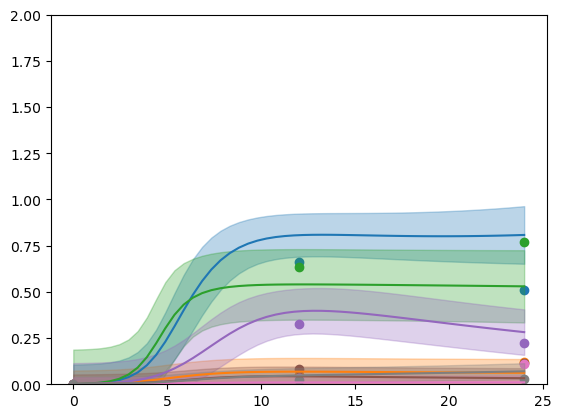

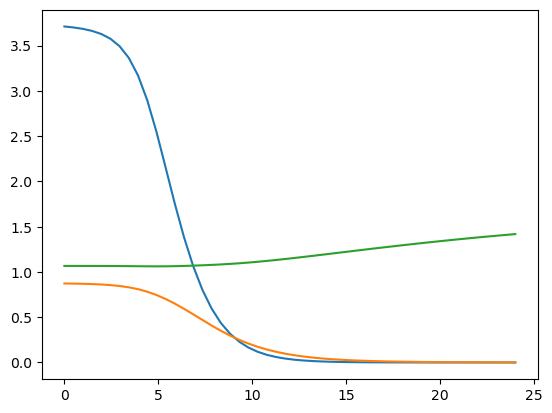

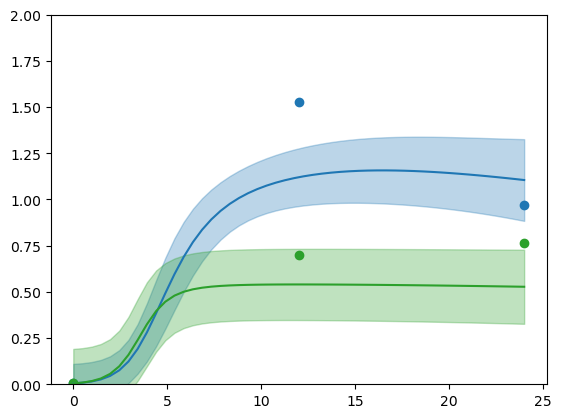

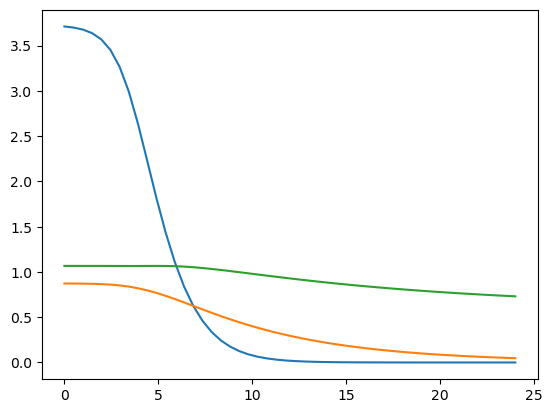

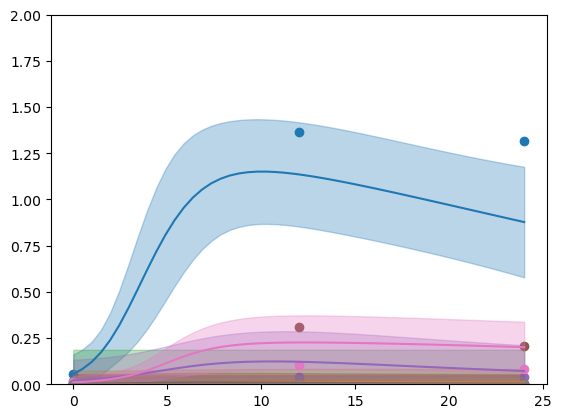

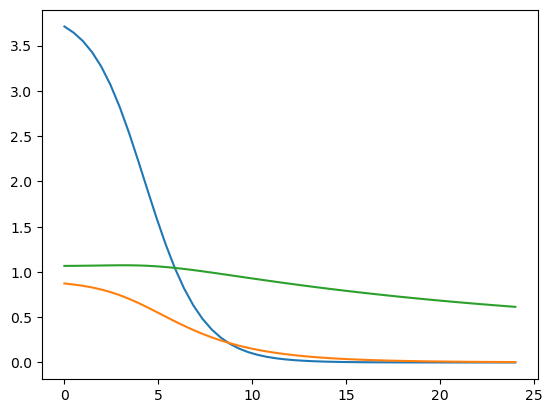

Total samples: 40, Updated regularization: 1.00e-03
Loss: 14.833, Residuals: -0.940
Loss: 12.005, Residuals: -0.848
Loss: 9.357, Residuals: -0.773
Loss: 7.987, Residuals: -0.443
Loss: 7.280, Residuals: -0.422
Loss: 6.762, Residuals: -0.416
Loss: 5.887, Residuals: -0.447
Loss: 5.655, Residuals: -0.387
Loss: 5.263, Residuals: -0.337
Loss: 4.716, Residuals: -0.343
Loss: 4.585, Residuals: -0.257
Loss: 3.823, Residuals: -0.226
Loss: 3.619, Residuals: -0.129
Loss: 3.484, Residuals: -0.135
Loss: 3.240, Residuals: -0.127
Loss: 3.209, Residuals: -0.074
Loss: 3.086, Residuals: -0.062
Loss: 3.032, Residuals: -0.103
Loss: 2.929, Residuals: -0.104
Loss: 2.764, Residuals: -0.098
Loss: 2.734, Residuals: -0.091
Loss: 2.515, Residuals: -0.101
Loss: 2.483, Residuals: -0.102
Optimization terminated successfully.
Evidence -171.739
Updating precision...
Total samples: 40, Updated regularization: 1.35e-03
Loss: 10.820, Residuals: -0.074
Loss: 10.793, Residuals: -0.065
Optimization terminated successfully.
E

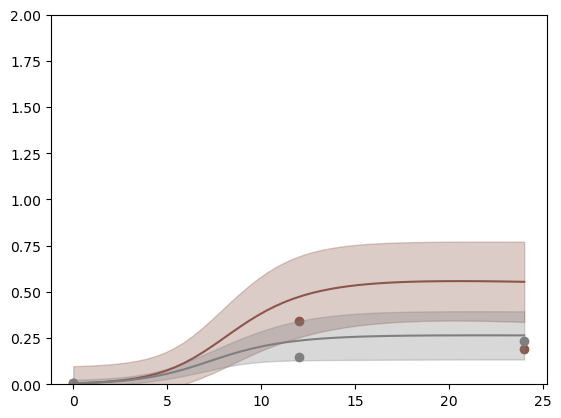

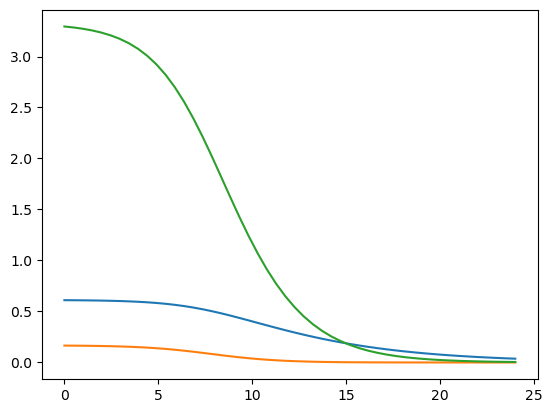

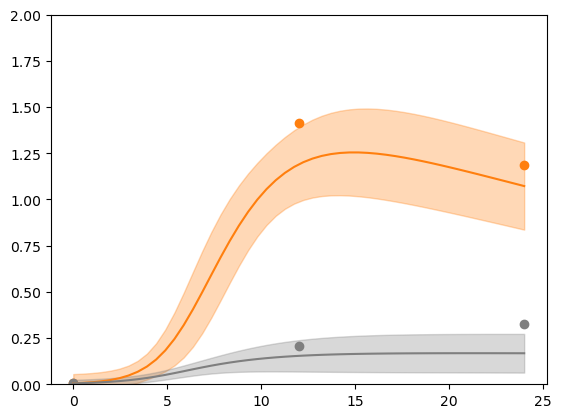

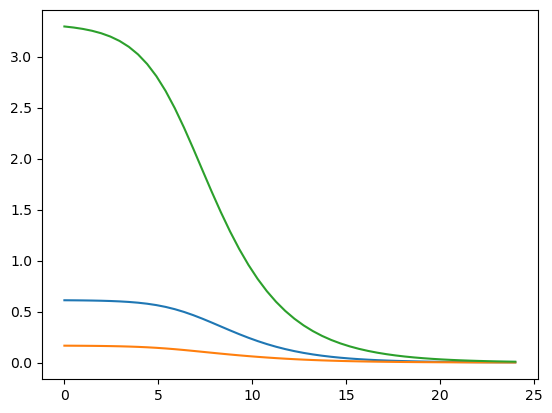

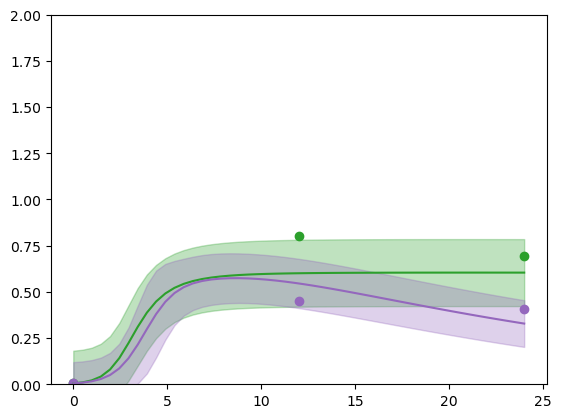

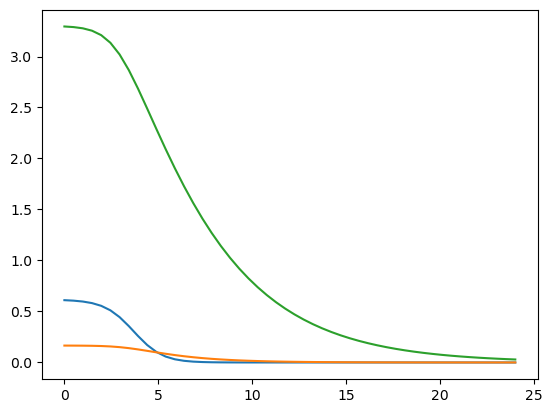

Total samples: 38, Updated regularization: 1.00e-03
Loss: 18.815, Residuals: -1.140
Loss: 12.290, Residuals: -0.644
Loss: 8.829, Residuals: -0.528
Loss: 6.161, Residuals: -0.369
Loss: 5.155, Residuals: -0.153
Loss: 3.774, Residuals: -0.166
Loss: 3.684, Residuals: -0.184
Loss: 3.195, Residuals: -0.190
Loss: 3.015, Residuals: -0.168
Loss: 2.834, Residuals: -0.094
Loss: 2.563, Residuals: -0.109
Loss: 2.516, Residuals: -0.091
Loss: 2.430, Residuals: -0.089
Loss: 2.288, Residuals: -0.099
Loss: 2.274, Residuals: -0.105
Optimization terminated successfully.
Evidence -201.996
Updating precision...
Total samples: 38, Updated regularization: 1.50e-03
Loss: 7.381, Residuals: -0.101
Loss: 7.268, Residuals: -0.066
Loss: 7.050, Residuals: -0.073
Loss: 6.755, Residuals: -0.100
Loss: 6.660, Residuals: -0.095
Optimization terminated successfully.
Evidence -47.960
Updating precision...
Total samples: 38, Updated regularization: 2.15e-03
Loss: 15.595, Residuals: -0.095
Loss: 15.536, Residuals: -0.065
Opt

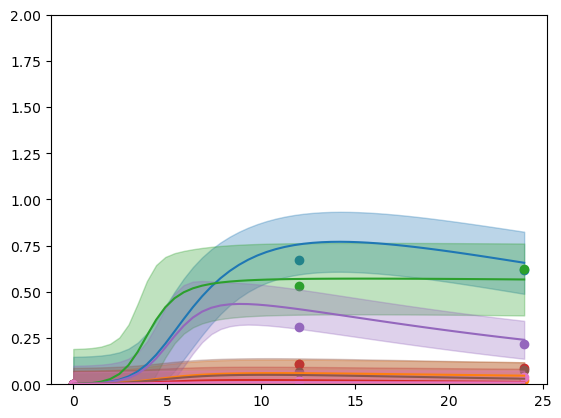

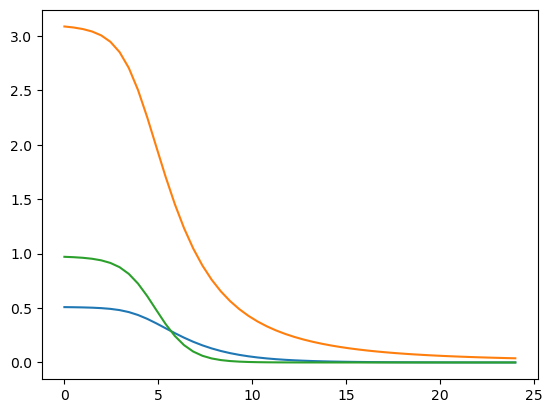

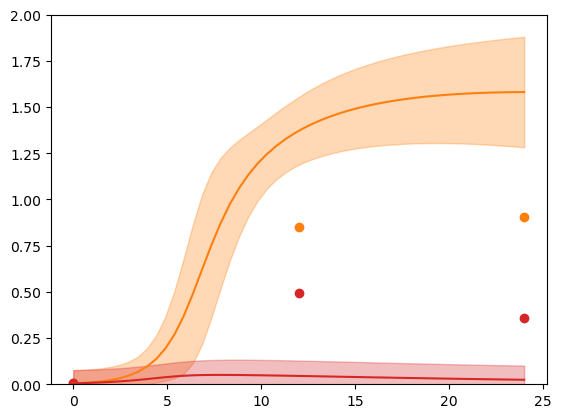

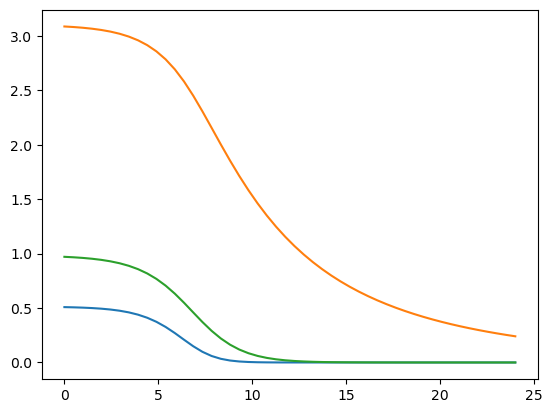

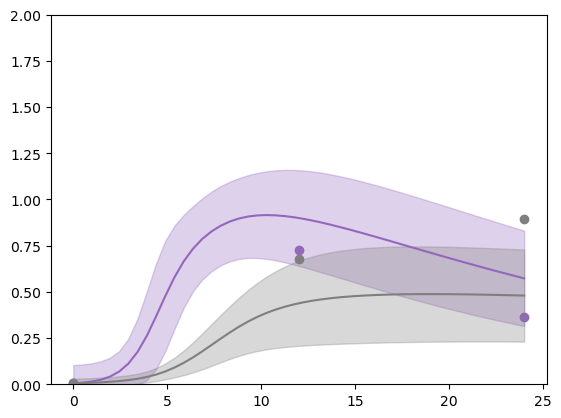

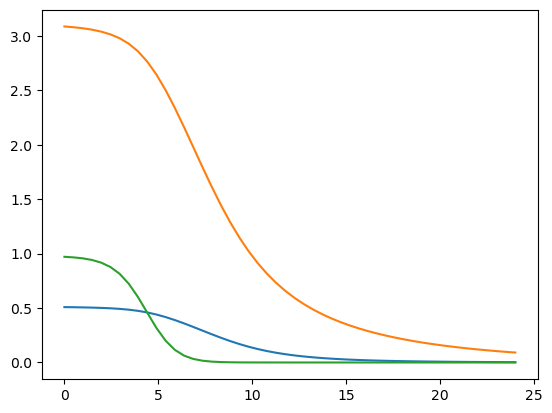

Total samples: 40, Updated regularization: 1.00e-03
Loss: 19.391, Residuals: -0.690
Loss: 13.662, Residuals: -1.006
Loss: 12.032, Residuals: -0.909
Loss: 11.172, Residuals: -0.810
Loss: 10.599, Residuals: -0.766
Loss: 10.060, Residuals: -0.672
Loss: 9.653, Residuals: -0.701
Loss: 9.317, Residuals: -0.738
Loss: 9.115, Residuals: -0.735
Loss: 8.814, Residuals: -0.645
Loss: 5.830, Residuals: -0.485
Loss: 5.126, Residuals: -0.299
Loss: 4.439, Residuals: -0.224
Loss: 4.296, Residuals: -0.141
Loss: 3.743, Residuals: -0.121
Loss: 3.232, Residuals: -0.147
Loss: 2.940, Residuals: -0.178
Loss: 2.811, Residuals: -0.117
Loss: 2.639, Residuals: -0.161
Loss: 2.553, Residuals: -0.097
Loss: 2.395, Residuals: -0.108
Loss: 2.371, Residuals: -0.095
Loss: 2.164, Residuals: -0.106
Loss: 2.138, Residuals: -0.072
Loss: 2.027, Residuals: -0.085
Loss: 2.008, Residuals: -0.072
Loss: 1.884, Residuals: -0.105
Loss: 1.853, Residuals: -0.075
Loss: 1.803, Residuals: -0.066
Loss: 1.718, Residuals: -0.077
Loss: 1.625,

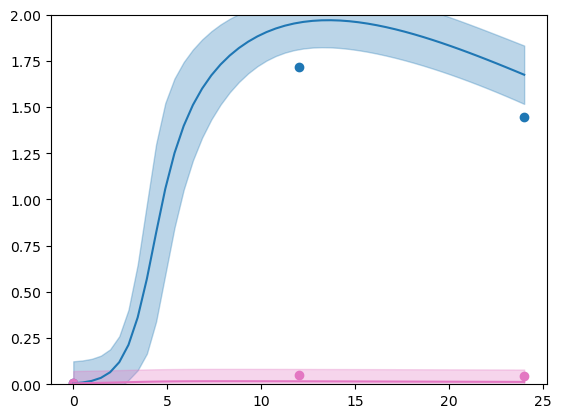

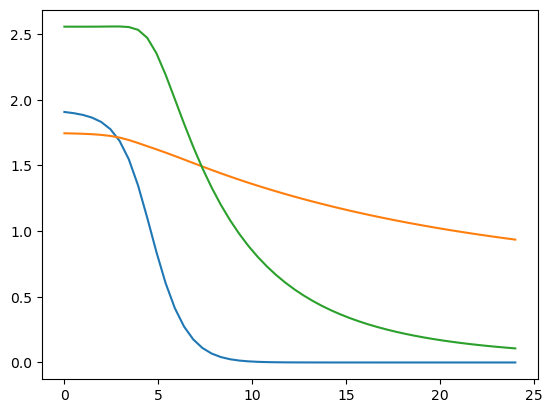

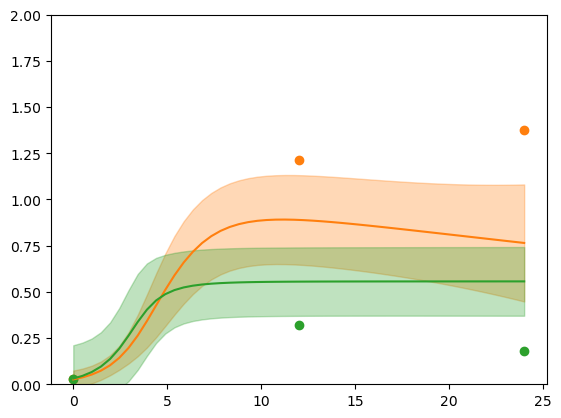

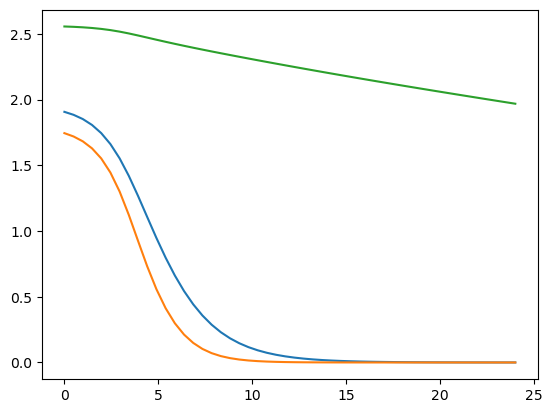

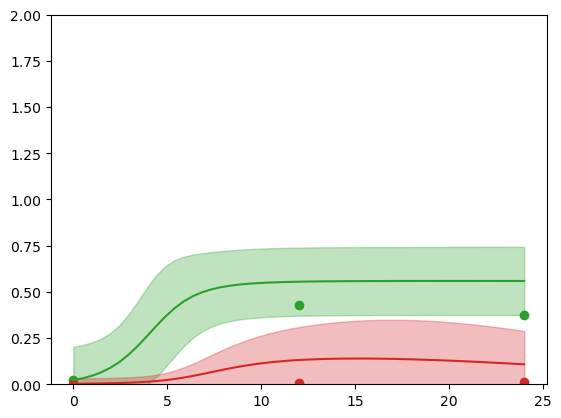

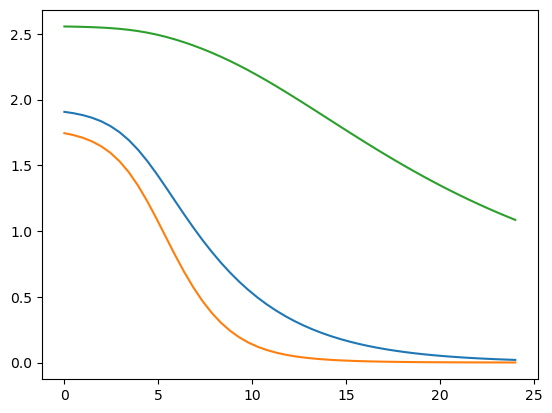

Total samples: 38, Updated regularization: 1.00e-03
Loss: 43.974, Residuals: -2.100
Loss: 20.686, Residuals: -0.747
Loss: 20.681, Residuals: -0.748
Loss: 20.681, Residuals: -0.748
Optimization terminated successfully.
Evidence -95.602
Updating precision...
Total samples: 38, Updated regularization: 1.14e-03


In [ ]:
# run kfold for each file 
for file in files:
    
    # import data
    df = pd.read_csv(f"data/{file}")

    # determine species names 
    species = df.columns.values[2:-3]
    inputs  = df.columns.values[-3:]

    # separate mono culture data 
    mono_df = pd.concat([df_i for name, df_i in df.groupby("Treatments") if "Mono" in name])
    dfs = [df_i for name, df_i in df.groupby("Treatments") if "Mono" not in name]

    # init kfold object
    kf = KFold(n_splits=20, shuffle=True, random_state=21)

    # keep track of all predictions
    all_pred_species = []
    all_true = []
    all_pred = []
    all_stdv = []

    # run Kfold 
    # train_index, test_index = next(iter(kf.split(dfs)))
    for train_index, test_index in kf.split(dfs):

        # get train df 
        train_df = pd.concat([dfs[i] for i in train_index])
        # train_df = pd.concat((mono_df, train_df))

        # get test df
        test_df = pd.concat([dfs[i] for i in test_index])

        # instantiate gLV fit 
        model = NSM(train_df, species, inputs, n_r=3)

        # fit to data 
        model.fit() 

        # plot fitness to data
        pred_species, true, pred, stdv = predict_df(model, test_df, species, inputs)

        # append predictions 
        all_pred_species = np.append(all_pred_species, pred_species)
        all_true = np.append(all_true, true)
        all_pred = np.append(all_pred, pred)
        all_stdv = np.append(all_stdv, stdv)

        # save prediction results to a .csv
        strain = file.split("_")[1]
        kfold_df = pd.DataFrame()
        kfold_df['species'] = all_pred_species
        kfold_df['true'] = all_true
        kfold_df['pred'] = all_pred
        kfold_df['stdv'] = all_stdv
        kfold_df.to_csv(f"kfold/{strain}_kfold_nsm.csv", index=False)
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain)
    plt.savefig(f"kfold/{strain}_kfold_nsm.pdf", dpi=300)
    plt.show()

In [ ]:
# params = np.concatenate([model.r0]+[p.ravel() for p in model.params])

# grad_fwd = model.jacobian_fwd(params)

# grad_adj = model.jacobian_adj(params)

# plt.scatter(np.array(grad_adj), np.array(grad_fwd))
# plt.show()

In [ ]:
for file in files:
    strain = file.split("_")[1]
    kfold_df = pd.read_csv(f"kfold/{strain}_kfold_nsm.csv")
        
    all_pred_species = kfold_df['species'].values
    all_true = kfold_df['true'].values 
    all_pred = kfold_df['pred'].values
    all_stdv = kfold_df['stdv'].values
        
    R_overall = linregress(all_true, all_pred).rvalue
        
    # show prediction performance of individual species
    for sp in species:
        sp_inds = all_pred_species == sp
        R = linregress(all_true[sp_inds], all_pred[sp_inds]).rvalue
        plt.scatter(all_true[sp_inds], all_pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(all_true[sp_inds], all_pred[sp_inds], yerr=all_stdv[sp_inds], 
                     fmt='.', capsize=3)

    plt.xlabel("Measured OD")
    plt.ylabel("Predicted OD")
    plt.legend()
    plt.title(strain + " R={:.2f}".format(R_overall))
    plt.show()

# Show example fit

In [ ]:
pred_species, true, pred, stdv = predict_df(model, train_df, species, inputs)

for sp in species:
    sp_inds = pred_species == sp
    if sum(true[sp_inds]) > 0:
        R = linregress(true[sp_inds], pred[sp_inds]).rvalue
        plt.scatter(true[sp_inds], pred[sp_inds], label=f"{sp} " + "R={:.3f}".format(R))
        plt.errorbar(true[sp_inds], pred[sp_inds], yerr= stdv[sp_inds], 
                     fmt='.', capsize=3)
plt.legend()
plt.show()